In [3]:
#model fit
import os
import numpy as np
from sklearn.externals import joblib
from bert_serving.client import BertClient
from bratreader.repomodel import RepoModel
from sklearn.preprocessing import LabelEncoder
from model_com import create_base_network, get_events, fit_on_data, test_on_data, event_extract_kzg, get_events_in_mention


import tensorflow as tf
from keras import backend as K
en_GPU = 1
if en_GPU:
    num_GPU, num_CPU = 2, 8
else:
    num_GPU, num_CPU = 0, 8

config = tf.ConfigProto(intra_op_parallelism_threads=num_CPU,
                        inter_op_parallelism_threads=num_CPU, 
                        allow_soft_placement=True,
                        device_count = {'CPU' : num_CPU,
                                        'GPU' : num_GPU}
                       )
session = tf.Session(config=config)
K.set_session(session)


DIR_DATA = 'data_ACE_English'
print('\ndata importing:')
TASK_NAME = DIR_DATA
NAME_DATA_FILE = TASK_NAME+'_data_import'+'.save'

# obtain all the files list
ANN_FILEs = []
DIR_ALL_FILES = os.listdir(DIR_DATA)
for file_name in DIR_ALL_FILES:
    if file_name.split('.')[-1] == 'txt':
        ANN_FILEs.append(file_name[:-4])

DIR_MODEL = './save/'
file_model_trig = DIR_MODEL + TASK_NAME +'_model_trigger.pkl'
file_model_arg = DIR_MODEL + TASK_NAME + '_model_arg.pkl'
bc = BertClient(ip='127.0.0.1', port=8701, port_out=8702, show_server_config=False) # bert model as service
triggers, vec_trig, label_trig, args, vec_arg, label_arg = [], [], [], [], [], []
try:
    triggers, vec_trig, label_trig, args, vec_arg, label_arg = joblib.load(NAME_DATA_FILE)
    args, vec_arg, label_arg = None, None, None
except:
    corpus = RepoModel(DIR_DATA) # load corpus
    for ANN_FILE in ANN_FILEs:
        doc = corpus.documents[ANN_FILE] # get document with key
        ttriggers, tvec_trig, tlabel_trig, targs, tvec_arg, tlabel_arg, tlabel_arg_for_each_trig = get_events_in_mention(doc, bc)
        triggers.extend(ttriggers)
        vec_trig.extend(tvec_trig)
        label_trig.extend(tlabel_trig)
        args.extend(targs)
        vec_arg.extend(tvec_arg)
        label_arg.extend(tlabel_arg)
    
    print('trigs:', len(vec_trig), 'args:', len(vec_arg))
    joblib.dump([triggers, vec_trig, label_trig, args, vec_arg, label_arg], NAME_DATA_FILE)
    args, vec_arg, label_arg = None, None, None
  
    

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages


data importing:
>>trigger model training:
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
>>test the model on given data:
samples: (52108, 768), 34 labels: {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer

<Figure size 4000x4000 with 2 Axes>

Normalized confusion matrix


<Figure size 4000x4000 with 2 Axes>

>>evaluating
loss :  0.5165918979027682
accuracy : 0.7226721424733247


>>fit the model on given data, learning_rate:0.01, N_batch:2048, N_epoch:143
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 samples
Epoch 1/143
52108/52108 [==============================] - 1s 12us/step - loss: 4.1437 - acc: 0.7221 - val_loss: 0.4845 - va

52108/52108 [==============================] - 0s 6us/step - loss: 3.5894 - acc: 0.7321 - val_loss: 0.4381 - val_acc: 0.7342
Epoch 54/143
52108/52108 [==============================] - 0s 9us/step - loss: 3.5804 - acc: 0.7328 - val_loss: 0.4386 - val_acc: 0.7343
Epoch 55/143
52108/52108 [==============================] - 0s 7us/step - loss: 3.5870 - acc: 0.7321 - val_loss: 0.4389 - val_acc: 0.7345
Epoch 56/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5920 - acc: 0.7329 - val_loss: 0.4384 - val_acc: 0.7343
Epoch 57/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5754 - acc: 0.7323 - val_loss: 0.4380 - val_acc: 0.7345
Epoch 58/143
52108/52108 [==============================] - 0s 5us/step - loss: 3.5799 - acc: 0.7328 - val_loss: 0.4368 - val_acc: 0.7345
Epoch 59/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5847 - acc: 0.7323 - val_loss: 0.4379 - val_acc: 0.7343
Epoch 60/143
52108/52108 [=====================

52108/52108 [==============================] - 0s 6us/step - loss: 3.5245 - acc: 0.7332 - val_loss: 0.4309 - val_acc: 0.7356
Epoch 113/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5156 - acc: 0.7333 - val_loss: 0.4306 - val_acc: 0.7353
Epoch 114/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5180 - acc: 0.7341 - val_loss: 0.4307 - val_acc: 0.7357
Epoch 115/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5226 - acc: 0.7345 - val_loss: 0.4310 - val_acc: 0.7357
Epoch 116/143
52108/52108 [==============================] - 0s 7us/step - loss: 3.5103 - acc: 0.7338 - val_loss: 0.4303 - val_acc: 0.7358
Epoch 117/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5144 - acc: 0.7338 - val_loss: 0.4301 - val_acc: 0.7354
Epoch 118/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.5109 - acc: 0.7343 - val_loss: 0.4306 - val_acc: 0.7356
Epoch 119/143
52108/52108 [==============

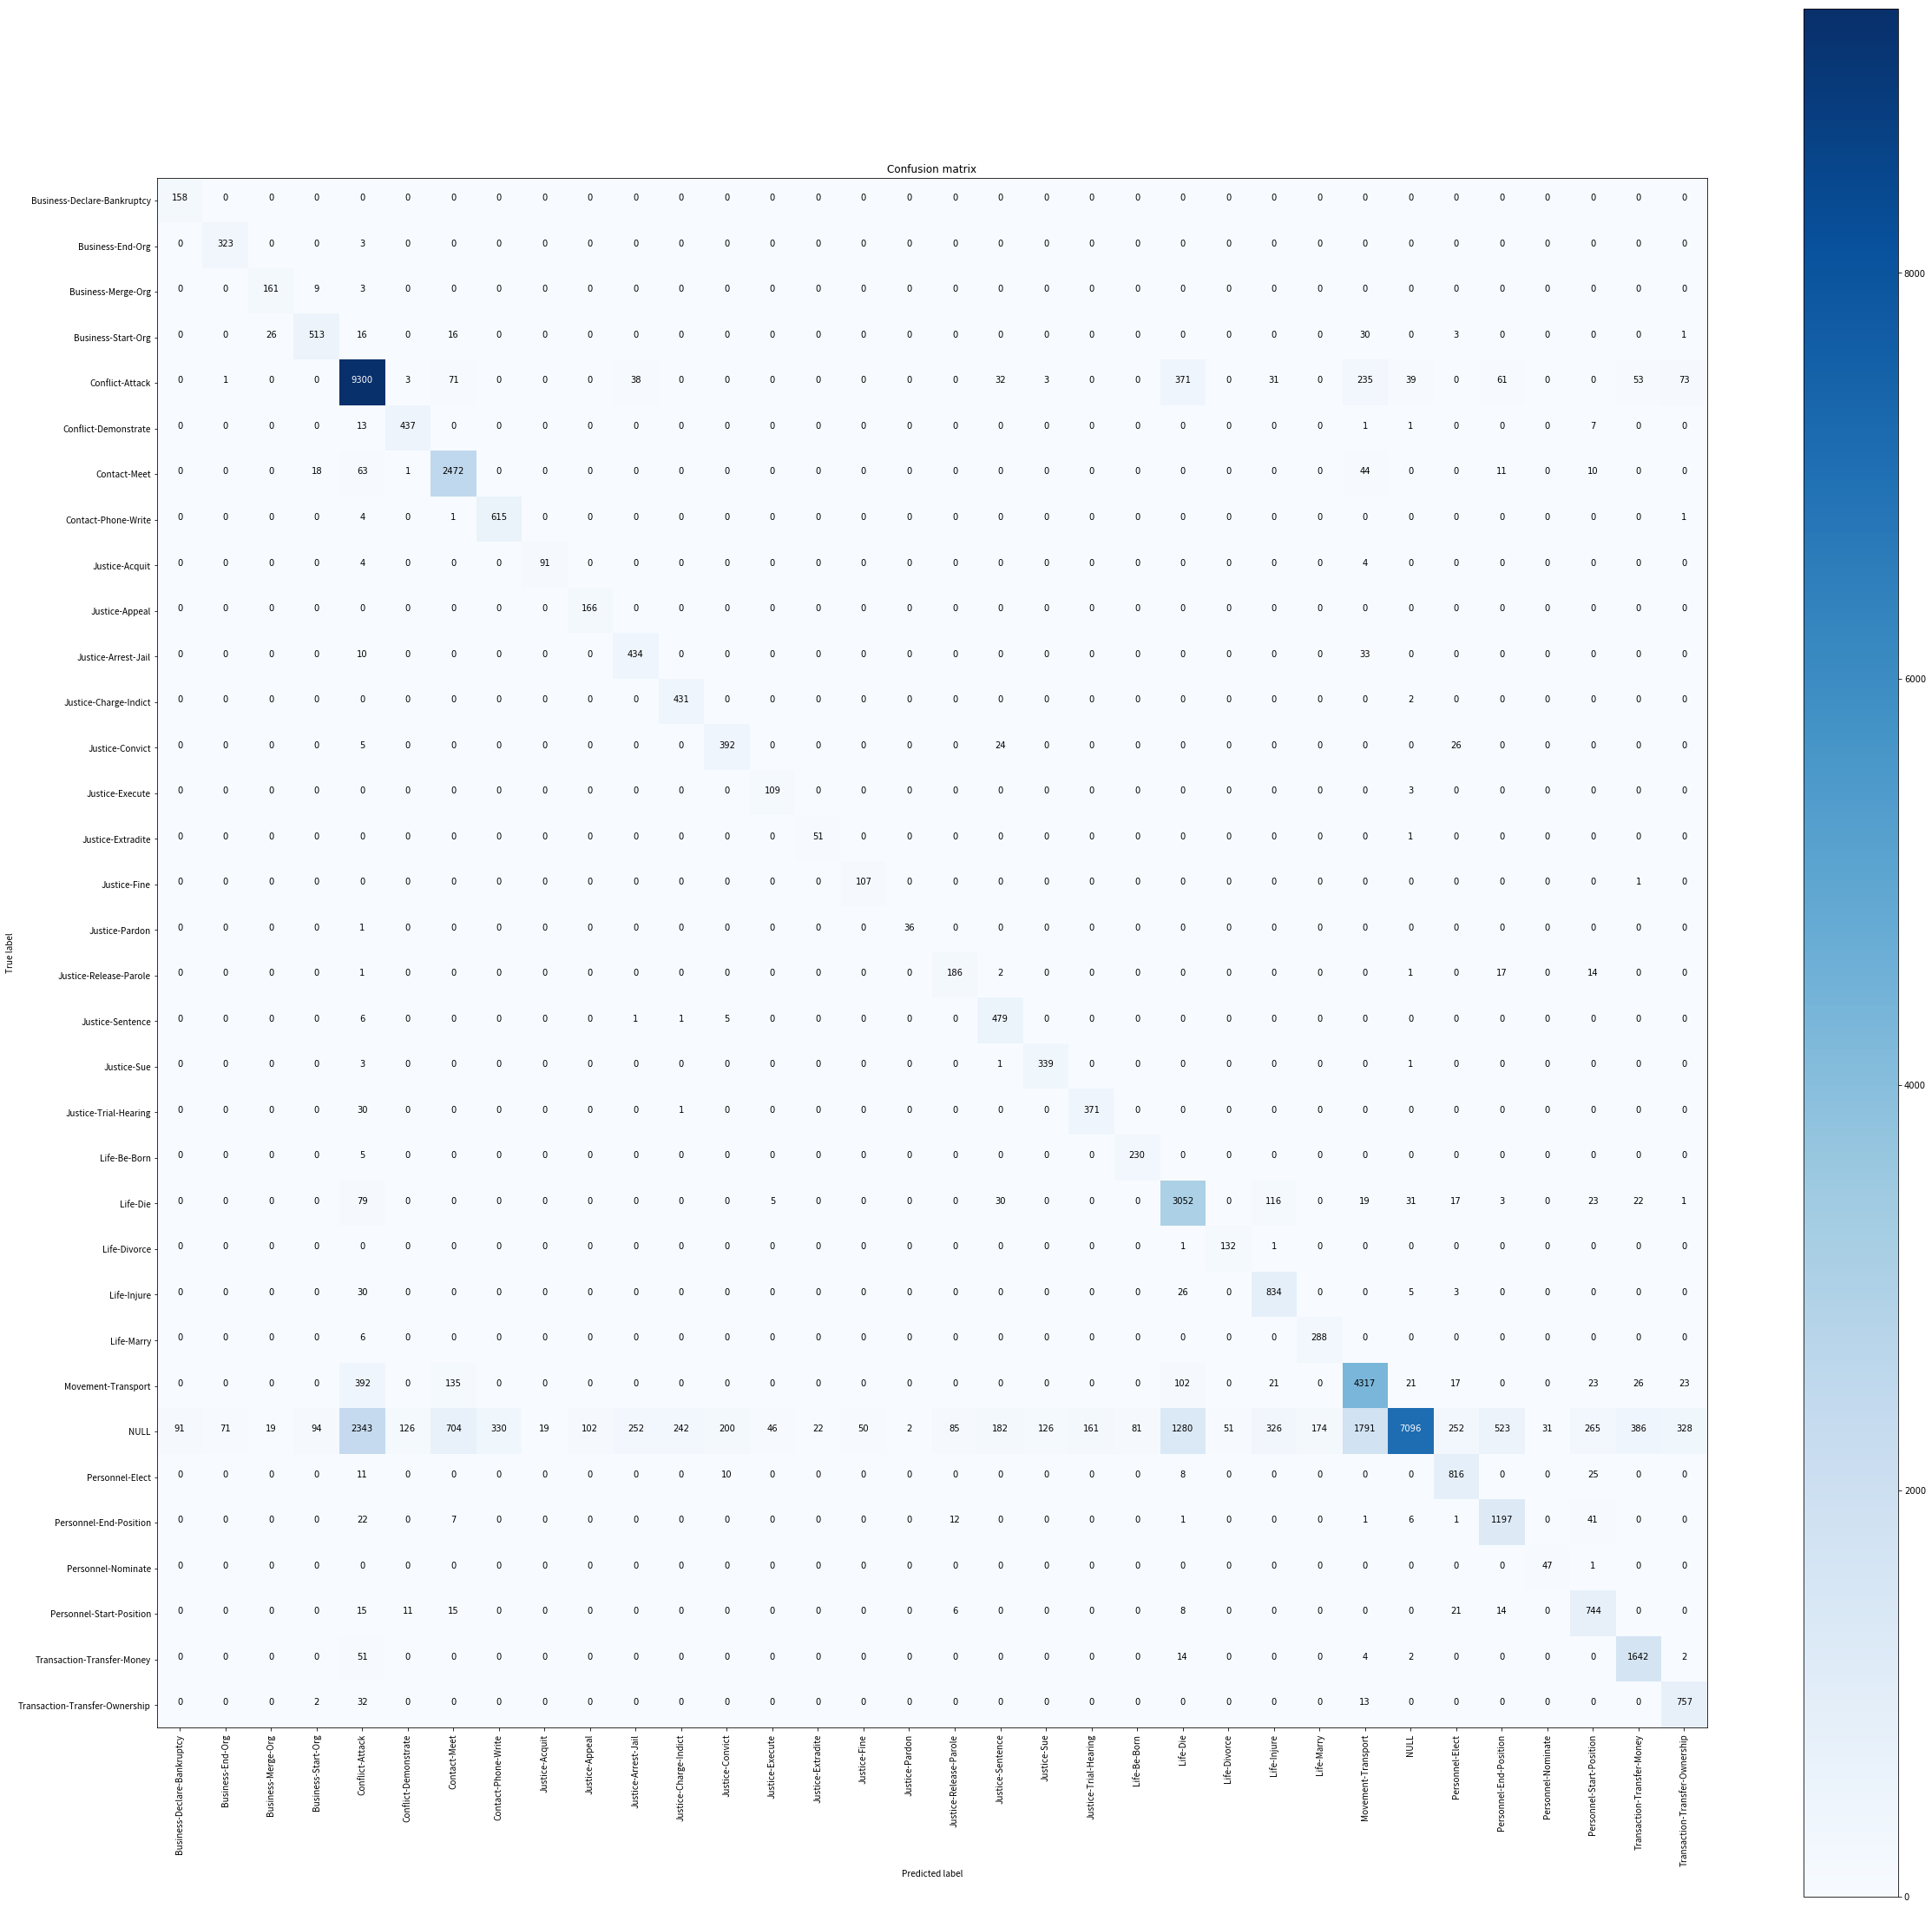

Normalized confusion matrix


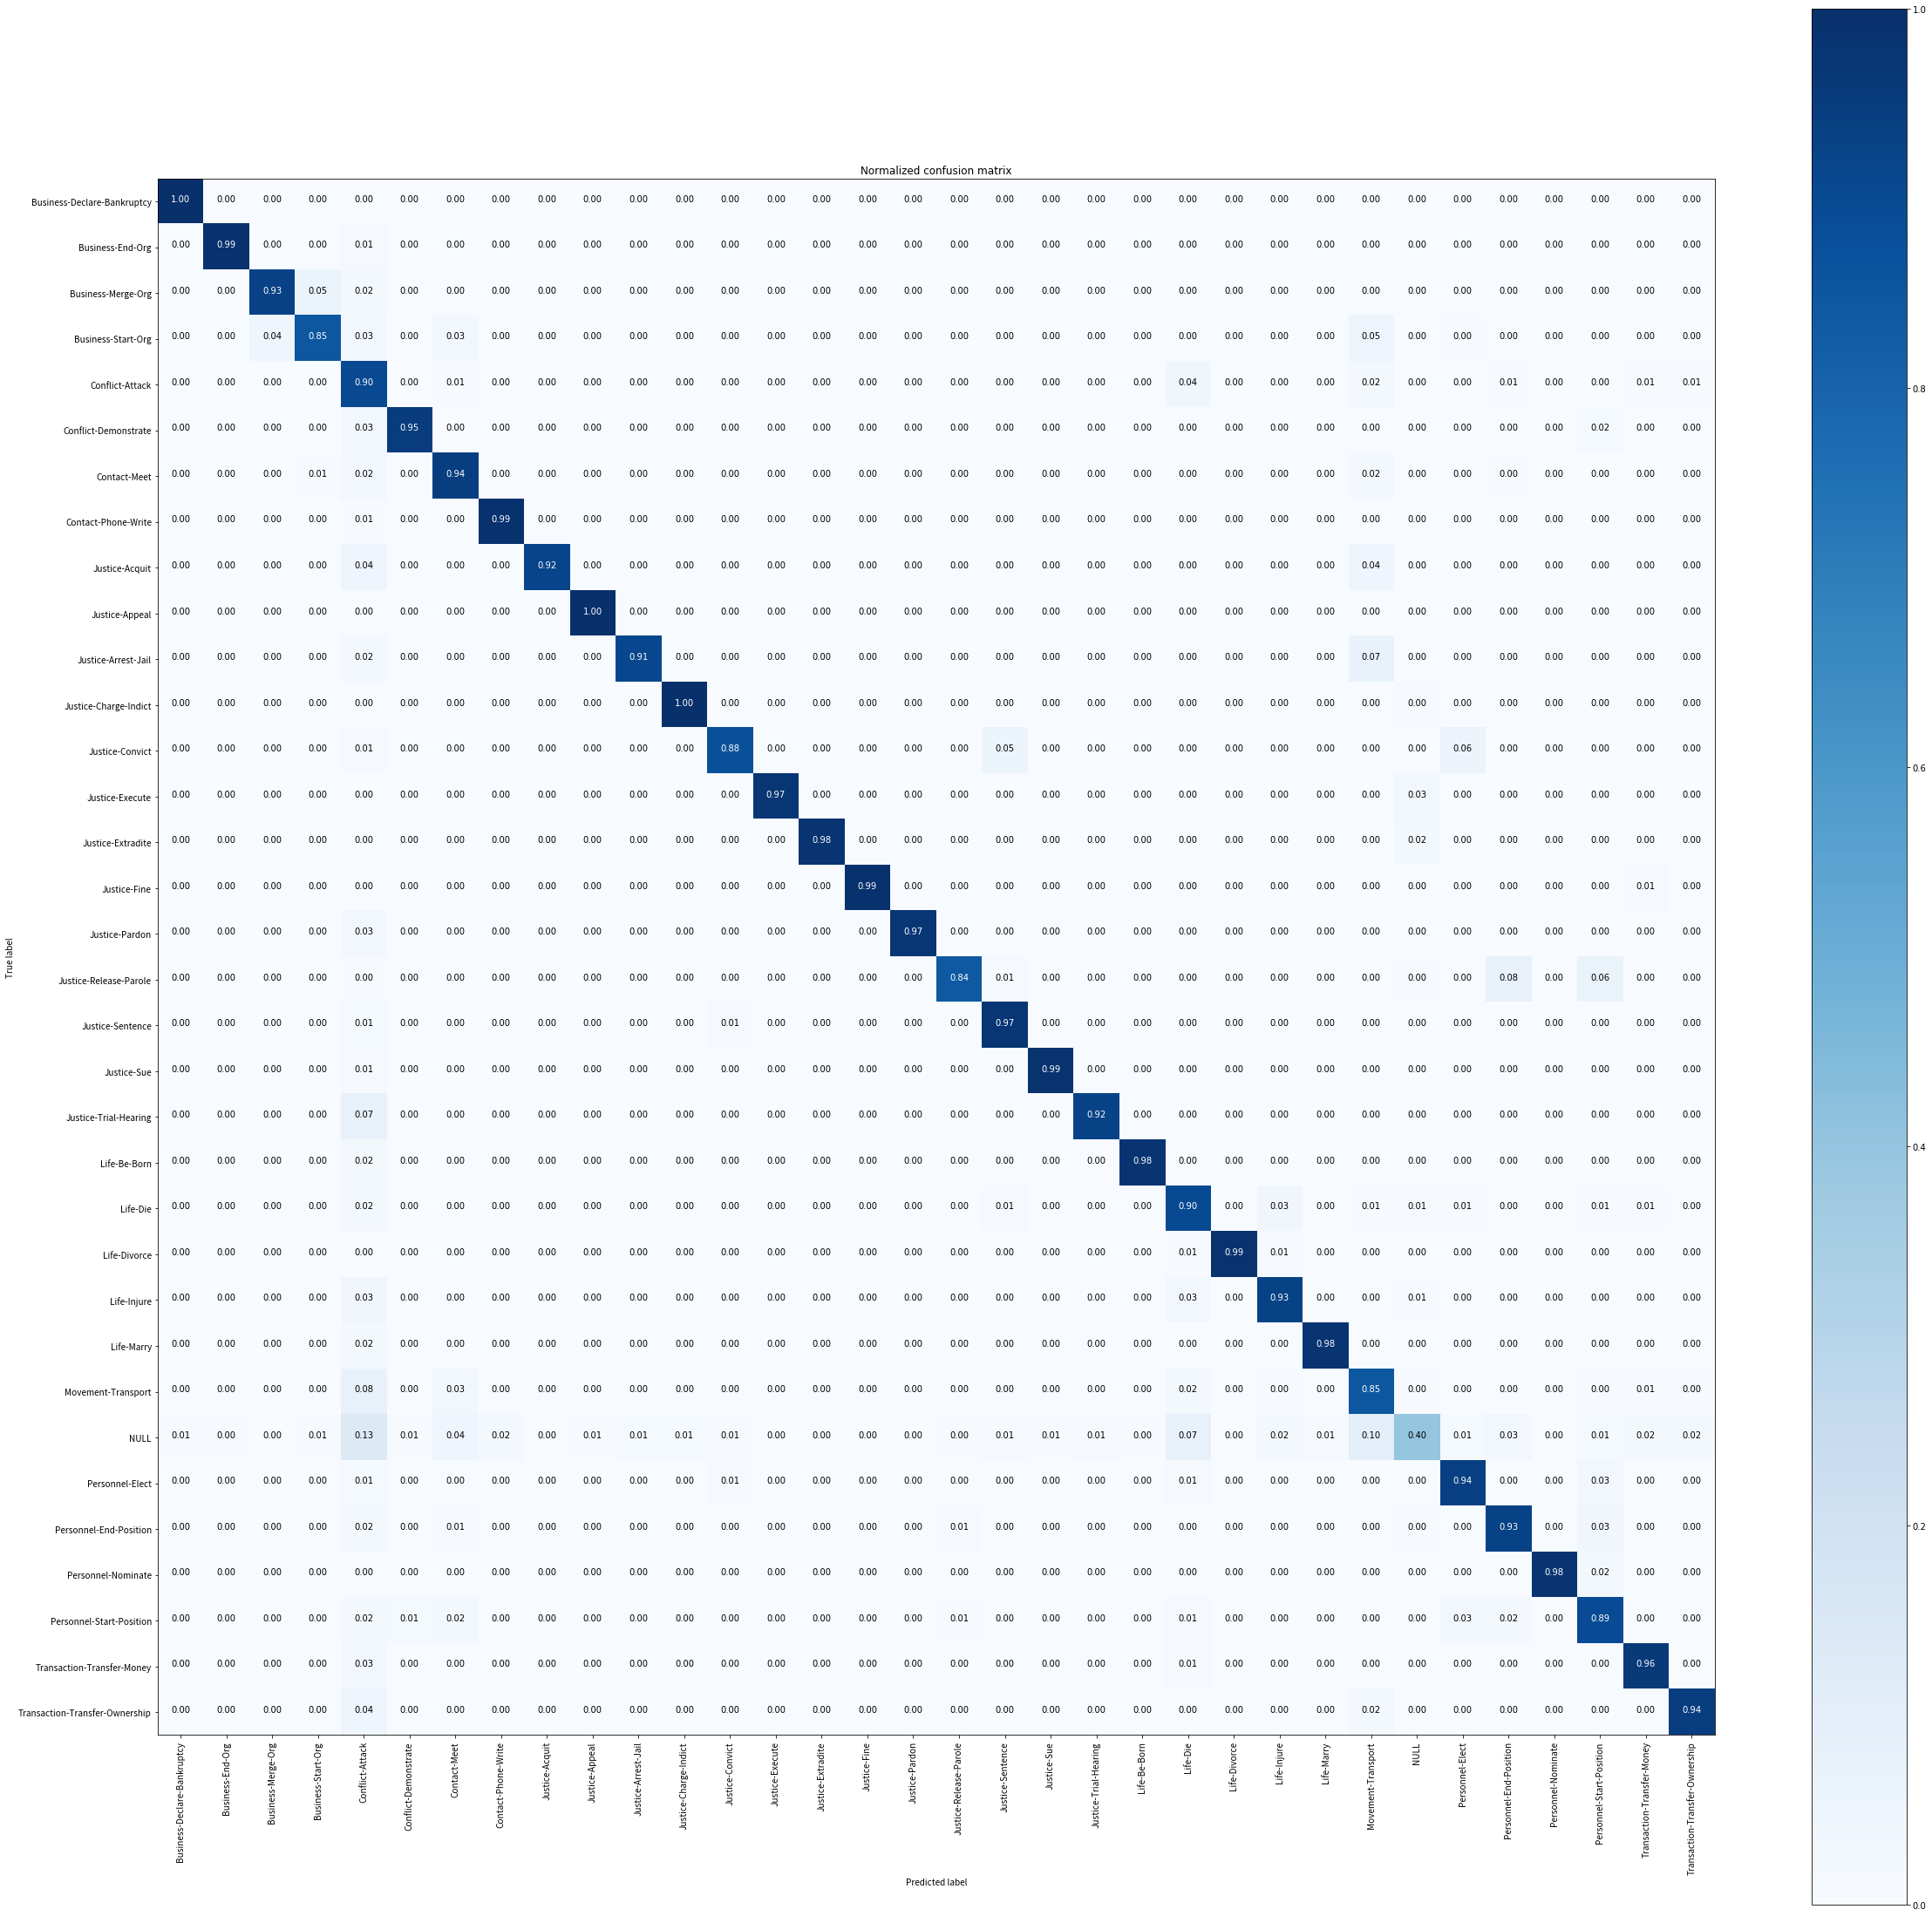

>>evaluating
52108/52108 [==============================] - 1s 22us/step
loss :  0.42794206952120284
accuracy : 0.735453289322177
>>fit the model on given data, learning_rate:0.005, N_batch:2048, N_epoch:143
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 s

52108/52108 [==============================] - 0s 6us/step - loss: 3.4863 - acc: 0.7347 - val_loss: 0.4265 - val_acc: 0.7358
Epoch 53/143
52108/52108 [==============================] - 0s 5us/step - loss: 3.4710 - acc: 0.7345 - val_loss: 0.4259 - val_acc: 0.7360
Epoch 54/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4732 - acc: 0.7355 - val_loss: 0.4267 - val_acc: 0.7358
Epoch 55/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4819 - acc: 0.7346 - val_loss: 0.4259 - val_acc: 0.7357
Epoch 56/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4690 - acc: 0.7348 - val_loss: 0.4266 - val_acc: 0.7359
Epoch 57/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4764 - acc: 0.7354 - val_loss: 0.4257 - val_acc: 0.7356
Epoch 58/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4772 - acc: 0.7346 - val_loss: 0.4263 - val_acc: 0.7357
Epoch 59/143
52108/52108 [=====================

52108/52108 [==============================] - 0s 7us/step - loss: 3.4618 - acc: 0.7349 - val_loss: 0.4242 - val_acc: 0.7363
Epoch 112/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4631 - acc: 0.7346 - val_loss: 0.4242 - val_acc: 0.7363
Epoch 113/143
52108/52108 [==============================] - 0s 7us/step - loss: 3.4696 - acc: 0.7345 - val_loss: 0.4247 - val_acc: 0.7362
Epoch 114/143
52108/52108 [==============================] - 0s 6us/step - loss: 3.4544 - acc: 0.7360 - val_loss: 0.4244 - val_acc: 0.7362
Epoch 115/143
52108/52108 [==============================] - 0s 8us/step - loss: 3.4681 - acc: 0.7338 - val_loss: 0.4244 - val_acc: 0.7364
Epoch 116/143
52108/52108 [==============================] - 0s 8us/step - loss: 3.4598 - acc: 0.7348 - val_loss: 0.4241 - val_acc: 0.7362
Epoch 117/143
52108/52108 [==============================] - 0s 8us/step - loss: 3.4646 - acc: 0.7346 - val_loss: 0.4243 - val_acc: 0.7363
Epoch 118/143
52108/52108 [==============

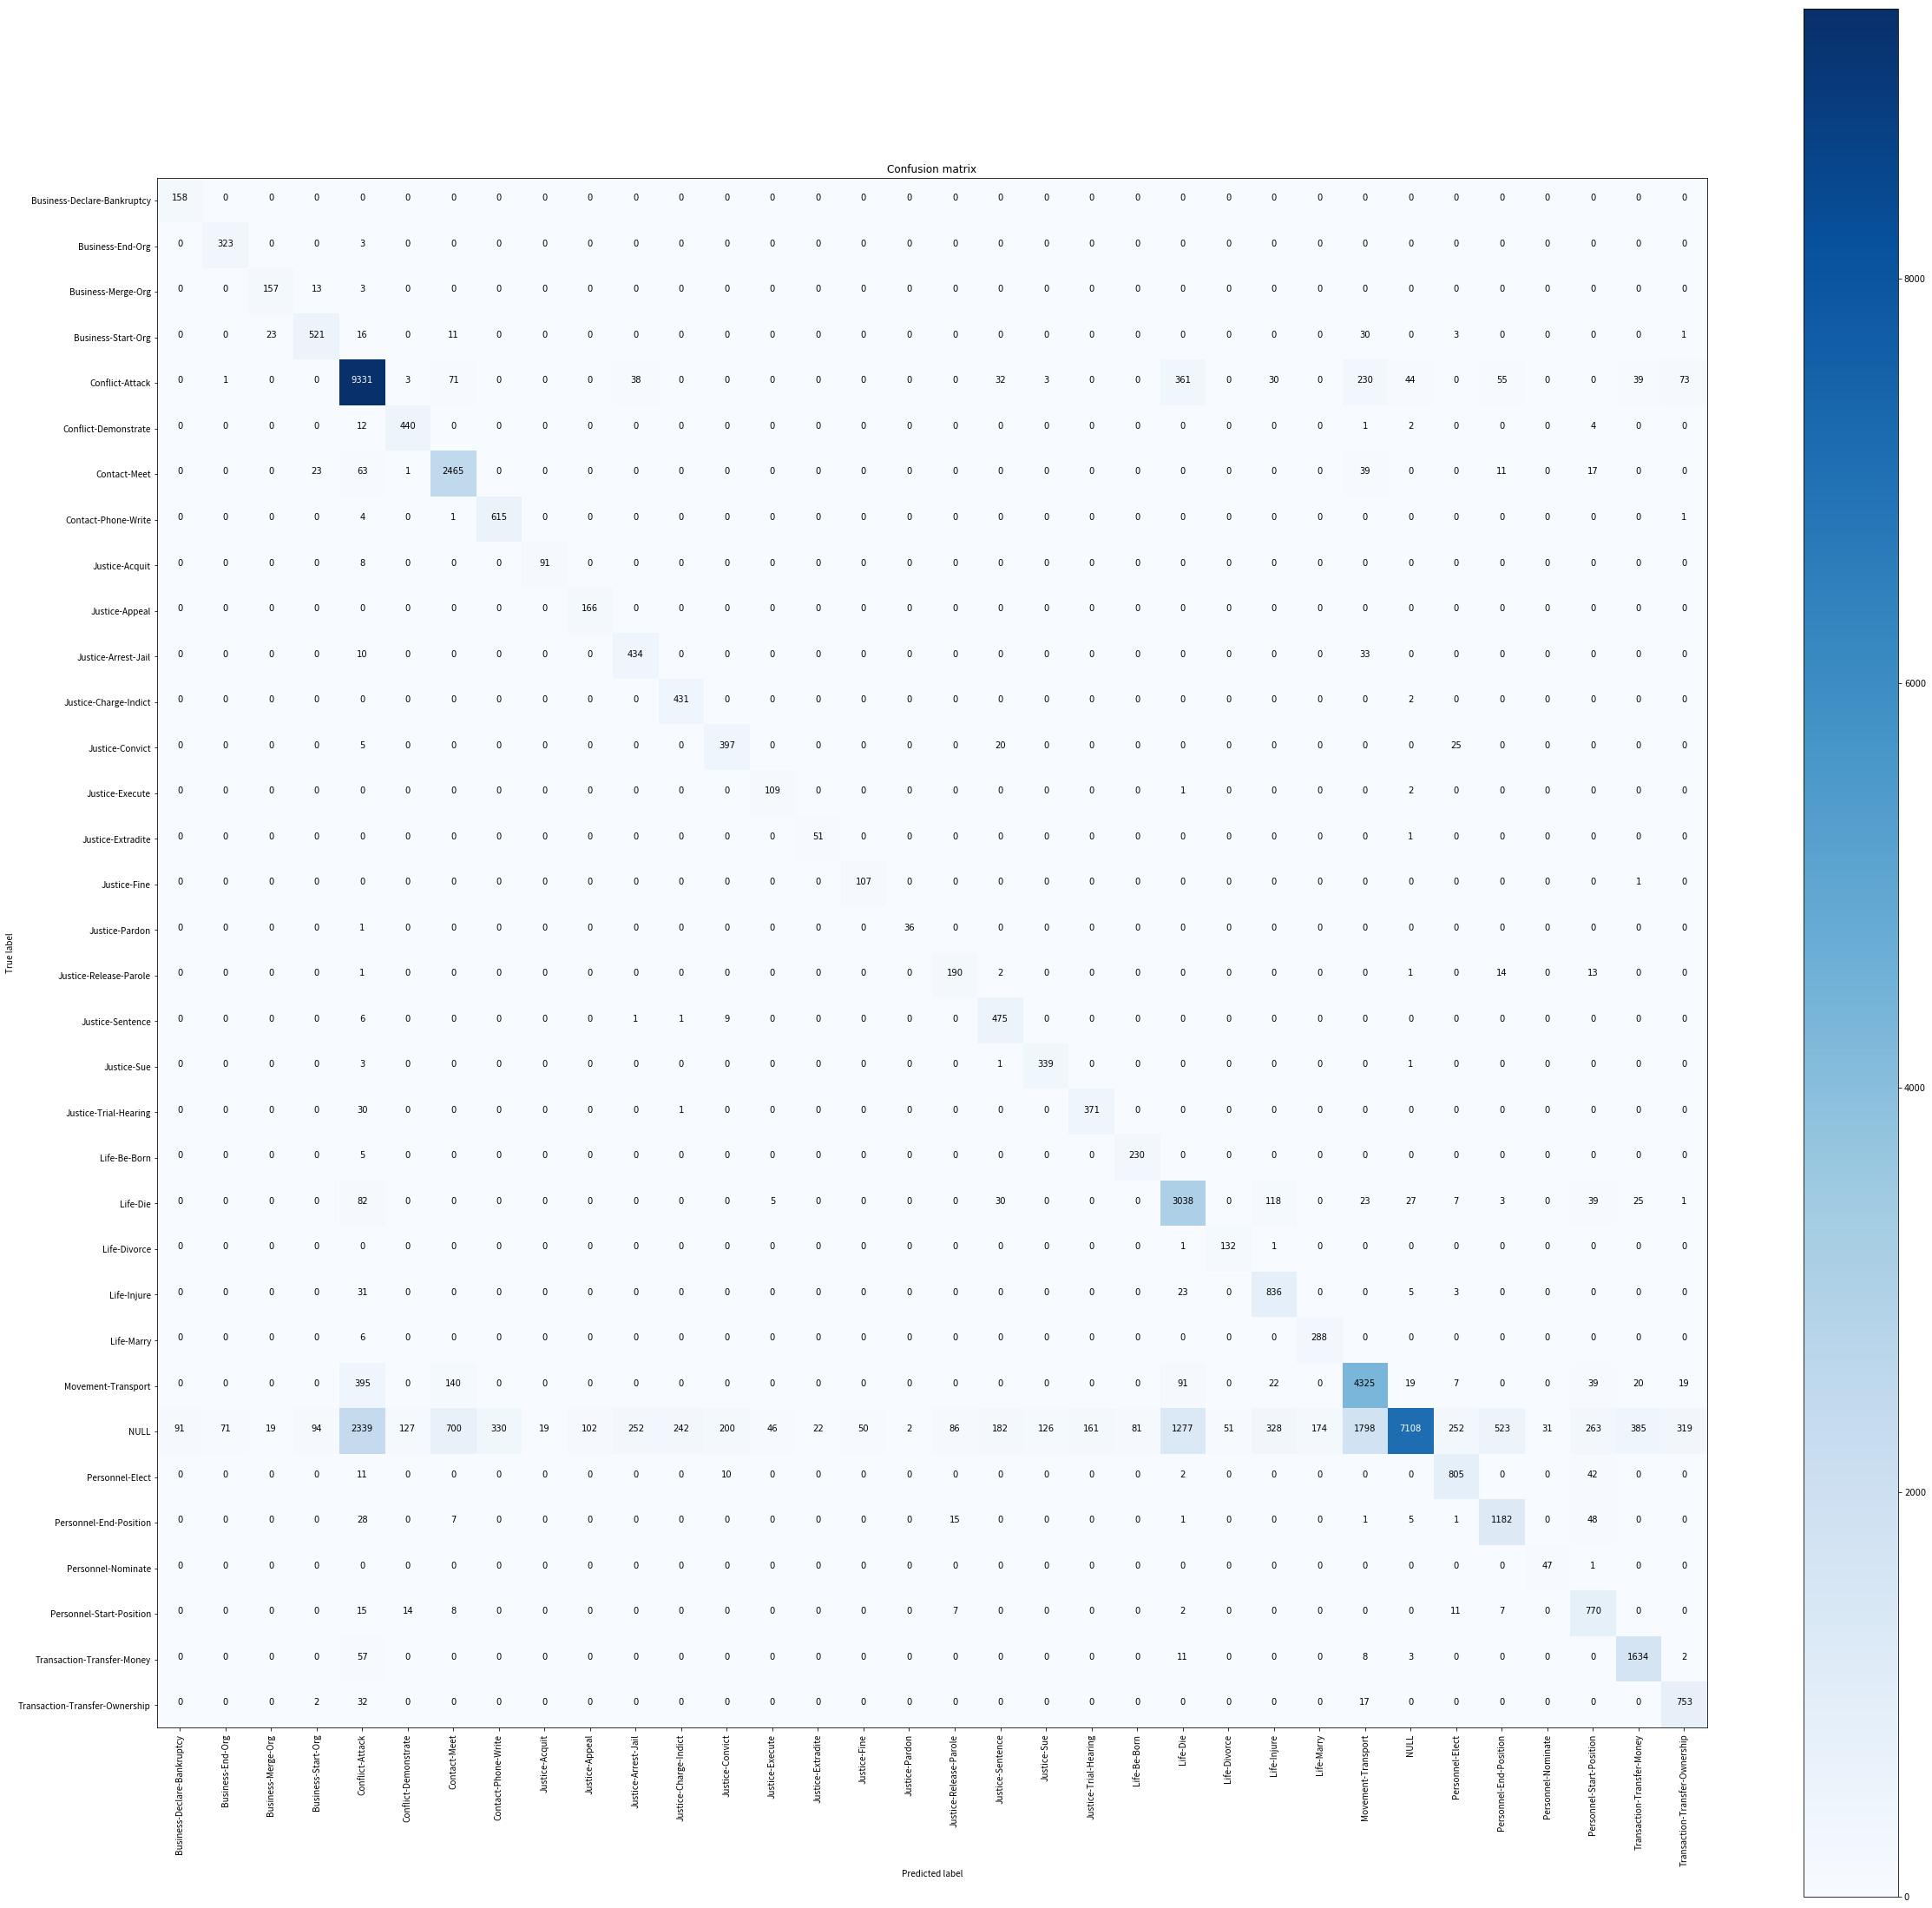

Normalized confusion matrix


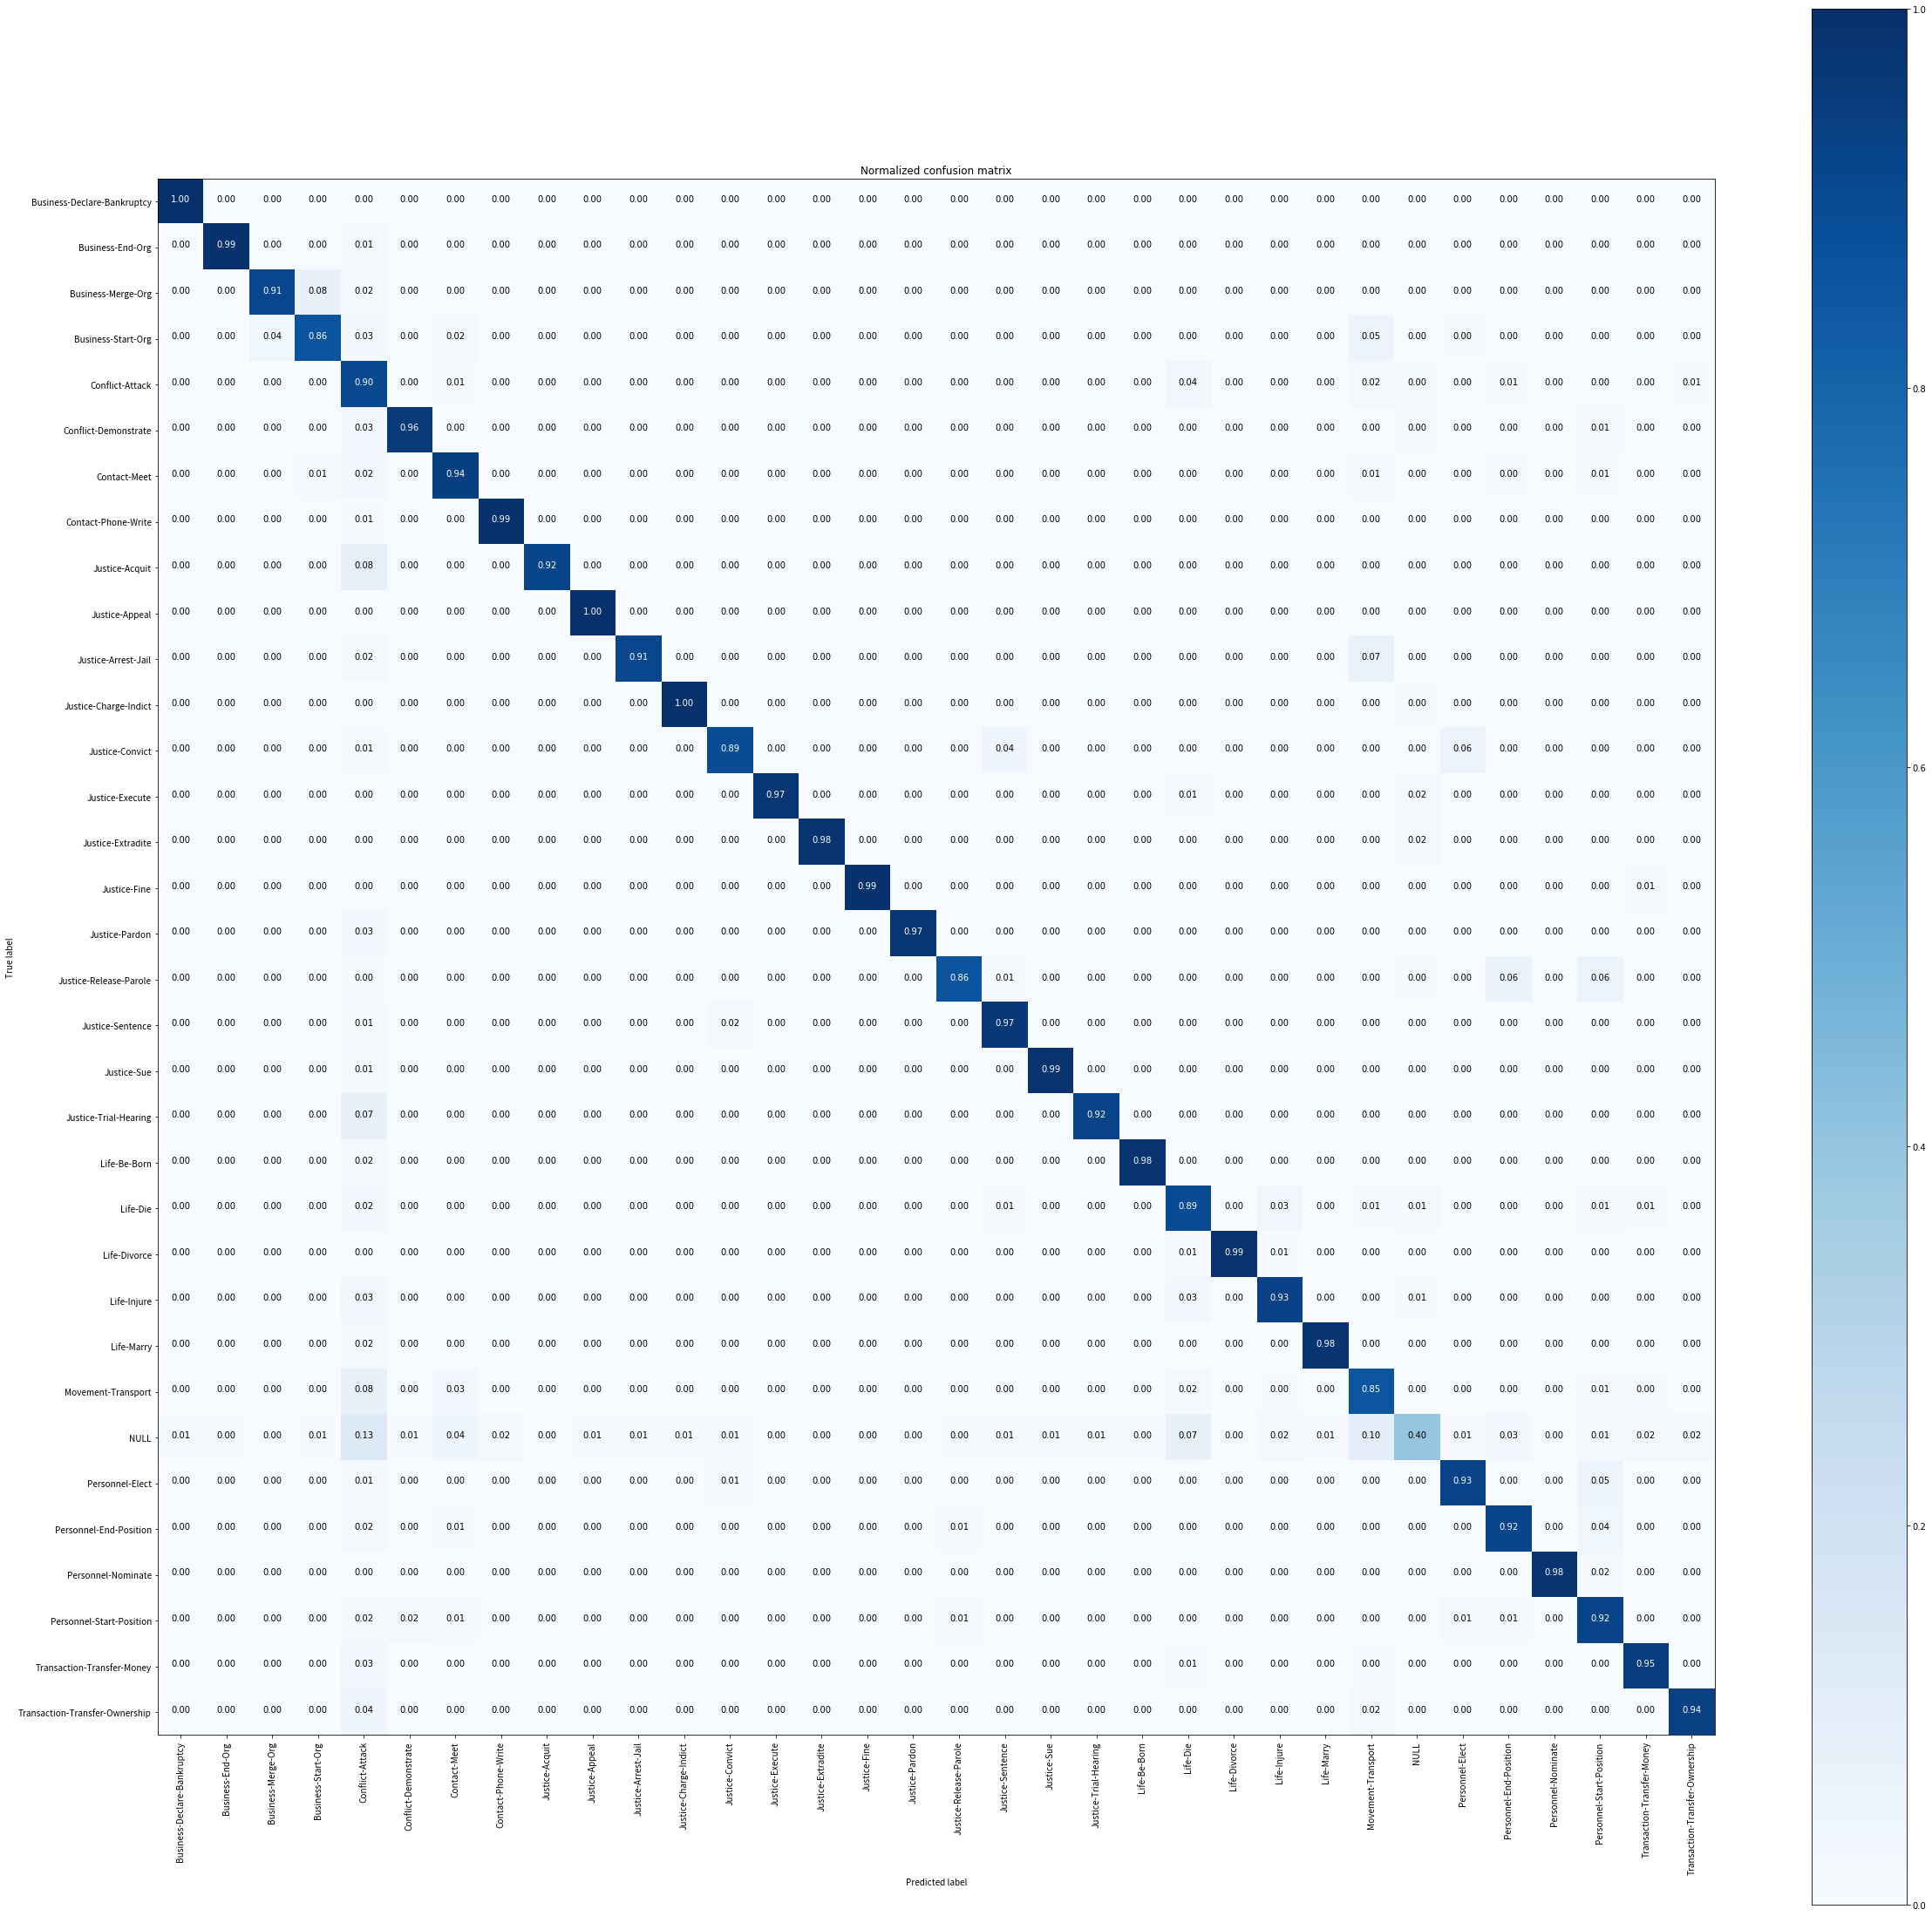

>>evaluating
52108/52108 [==============================] - 1s 21us/step
loss :  0.4238623688954645
accuracy : 0.7360673984800798
>>fit the model on given data, learning_rate:0.01, N_batch:1024, N_epoch:101
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 sa

52108/52108 [==============================] - 1s 10us/step - loss: 3.4286 - acc: 0.7347 - val_loss: 0.4194 - val_acc: 0.7367
Epoch 53/101
52108/52108 [==============================] - 1s 12us/step - loss: 3.4313 - acc: 0.7341 - val_loss: 0.4199 - val_acc: 0.7363
Epoch 54/101
52108/52108 [==============================] - 1s 15us/step - loss: 3.4147 - acc: 0.7351 - val_loss: 0.4192 - val_acc: 0.7370
Epoch 55/101
52108/52108 [==============================] - 0s 9us/step - loss: 3.4248 - acc: 0.7346 - val_loss: 0.4221 - val_acc: 0.7360
Epoch 56/101
52108/52108 [==============================] - 1s 11us/step - loss: 3.4249 - acc: 0.7351 - val_loss: 0.4201 - val_acc: 0.7369
Epoch 57/101
52108/52108 [==============================] - 1s 15us/step - loss: 3.4159 - acc: 0.7343 - val_loss: 0.4186 - val_acc: 0.7368
Epoch 58/101
52108/52108 [==============================] - 1s 11us/step - loss: 3.4173 - acc: 0.7343 - val_loss: 0.4196 - val_acc: 0.7367
Epoch 59/101
52108/52108 [===============

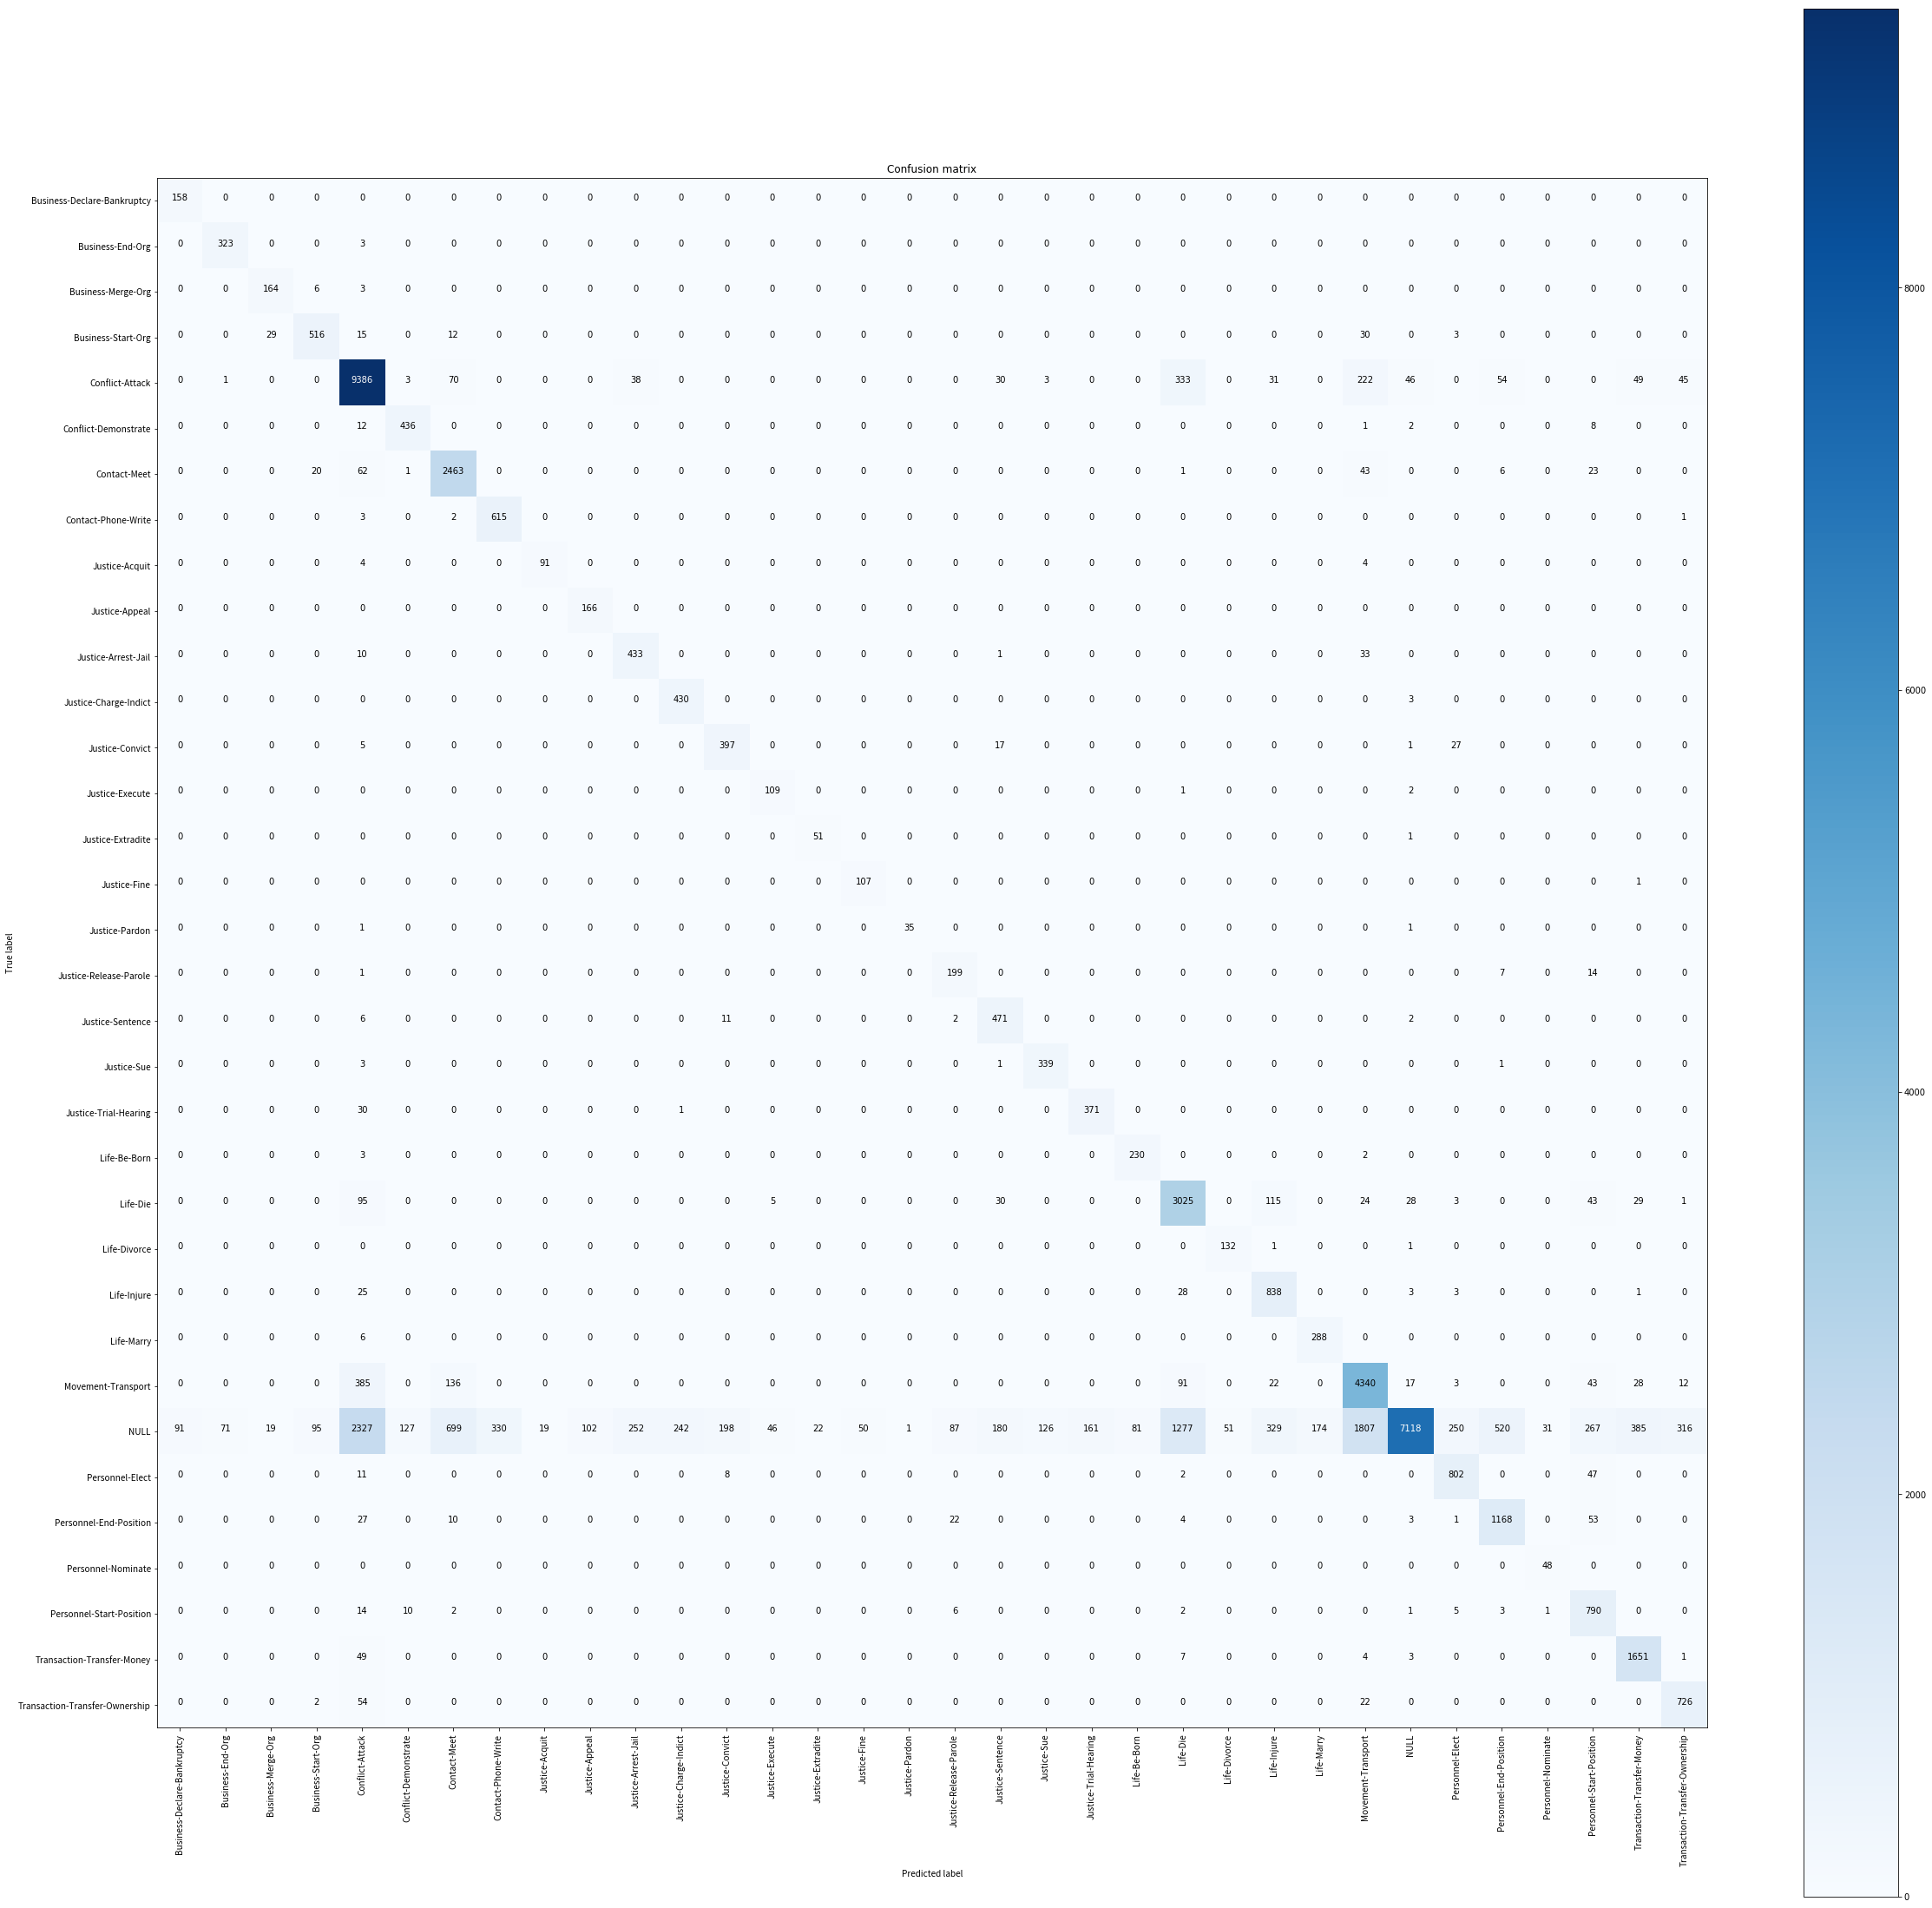

Normalized confusion matrix


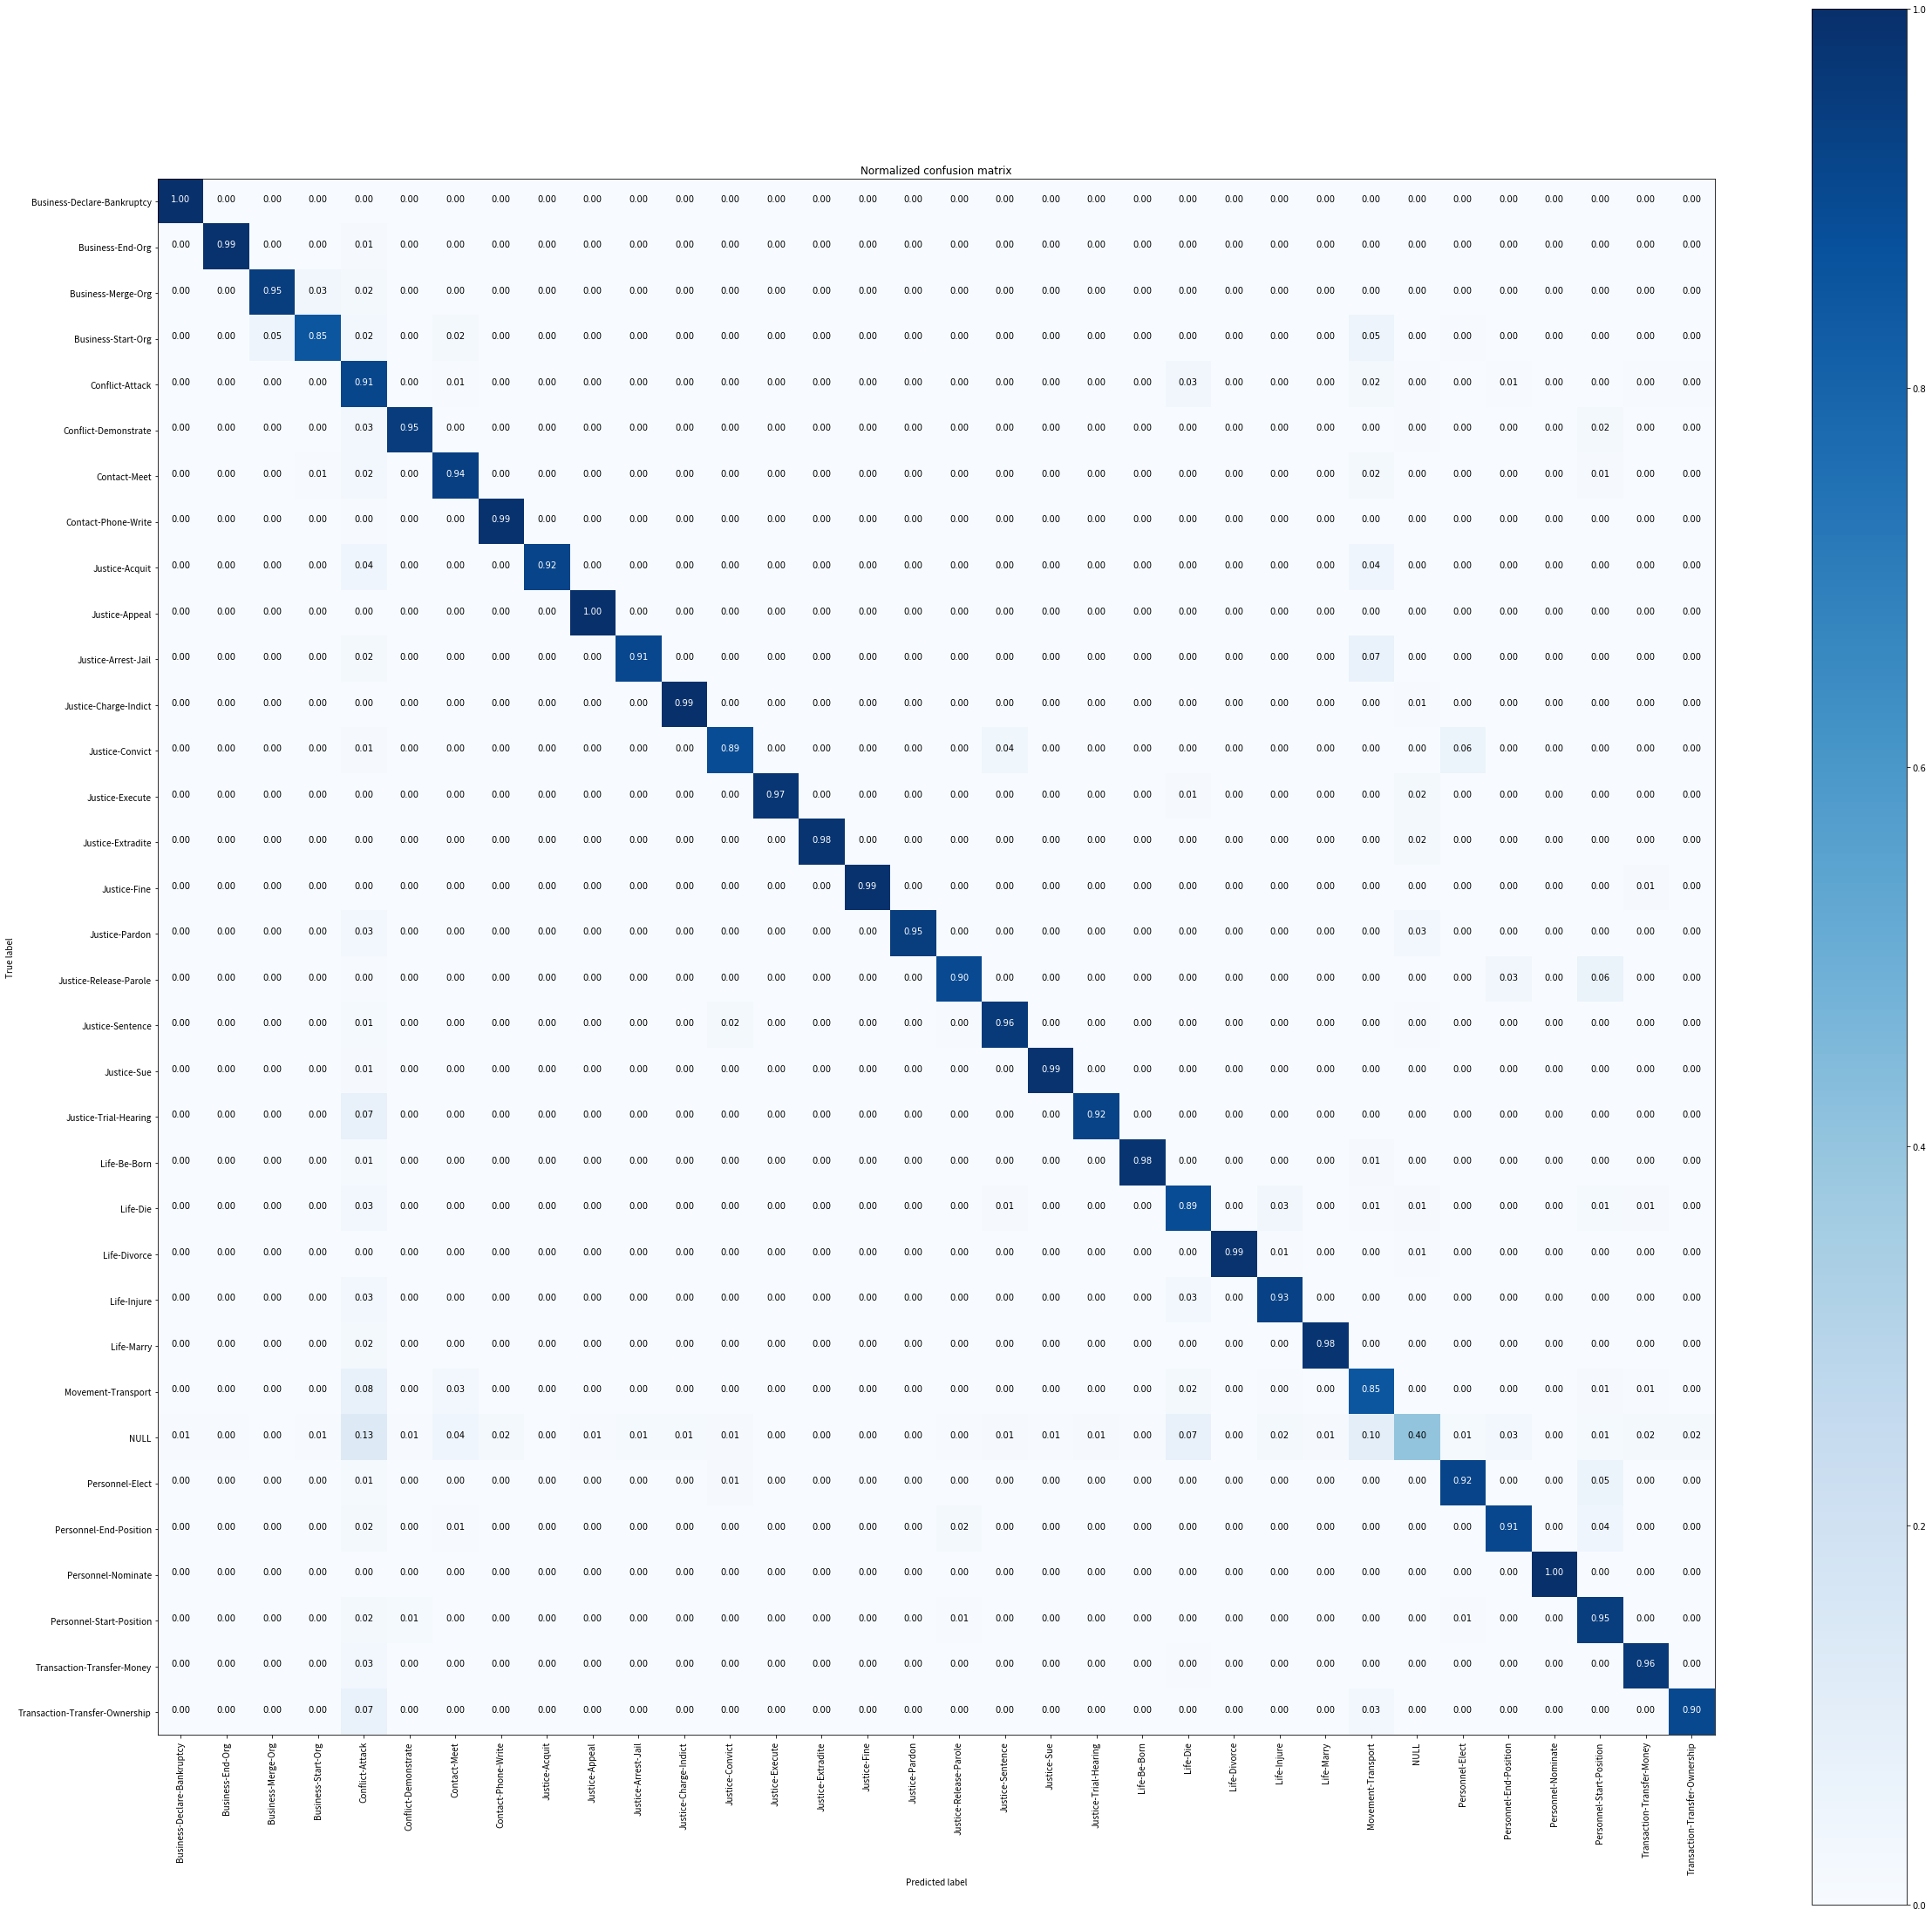

>>evaluating
52108/52108 [==============================] - 1s 21us/step
loss :  0.4165915075981792
accuracy : 0.7372380440623321
>>fit the model on given data, learning_rate:0.005, N_batch:1024, N_epoch:101
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 s

52108/52108 [==============================] - 0s 7us/step - loss: 3.3738 - acc: 0.7365 - val_loss: 0.4140 - val_acc: 0.7377
Epoch 53/101
52108/52108 [==============================] - 0s 7us/step - loss: 3.3767 - acc: 0.7359 - val_loss: 0.4139 - val_acc: 0.7377
Epoch 54/101
52108/52108 [==============================] - 0s 8us/step - loss: 3.3765 - acc: 0.7354 - val_loss: 0.4142 - val_acc: 0.7373
Epoch 55/101
52108/52108 [==============================] - 0s 7us/step - loss: 3.3765 - acc: 0.7354 - val_loss: 0.4144 - val_acc: 0.7370
Epoch 56/101
52108/52108 [==============================] - 0s 7us/step - loss: 3.3739 - acc: 0.7354 - val_loss: 0.4152 - val_acc: 0.7378
Epoch 57/101
52108/52108 [==============================] - 0s 7us/step - loss: 3.3703 - acc: 0.7359 - val_loss: 0.4133 - val_acc: 0.7380
Epoch 58/101
52108/52108 [==============================] - 0s 8us/step - loss: 3.3728 - acc: 0.7356 - val_loss: 0.4146 - val_acc: 0.7374
Epoch 59/101
52108/52108 [=====================

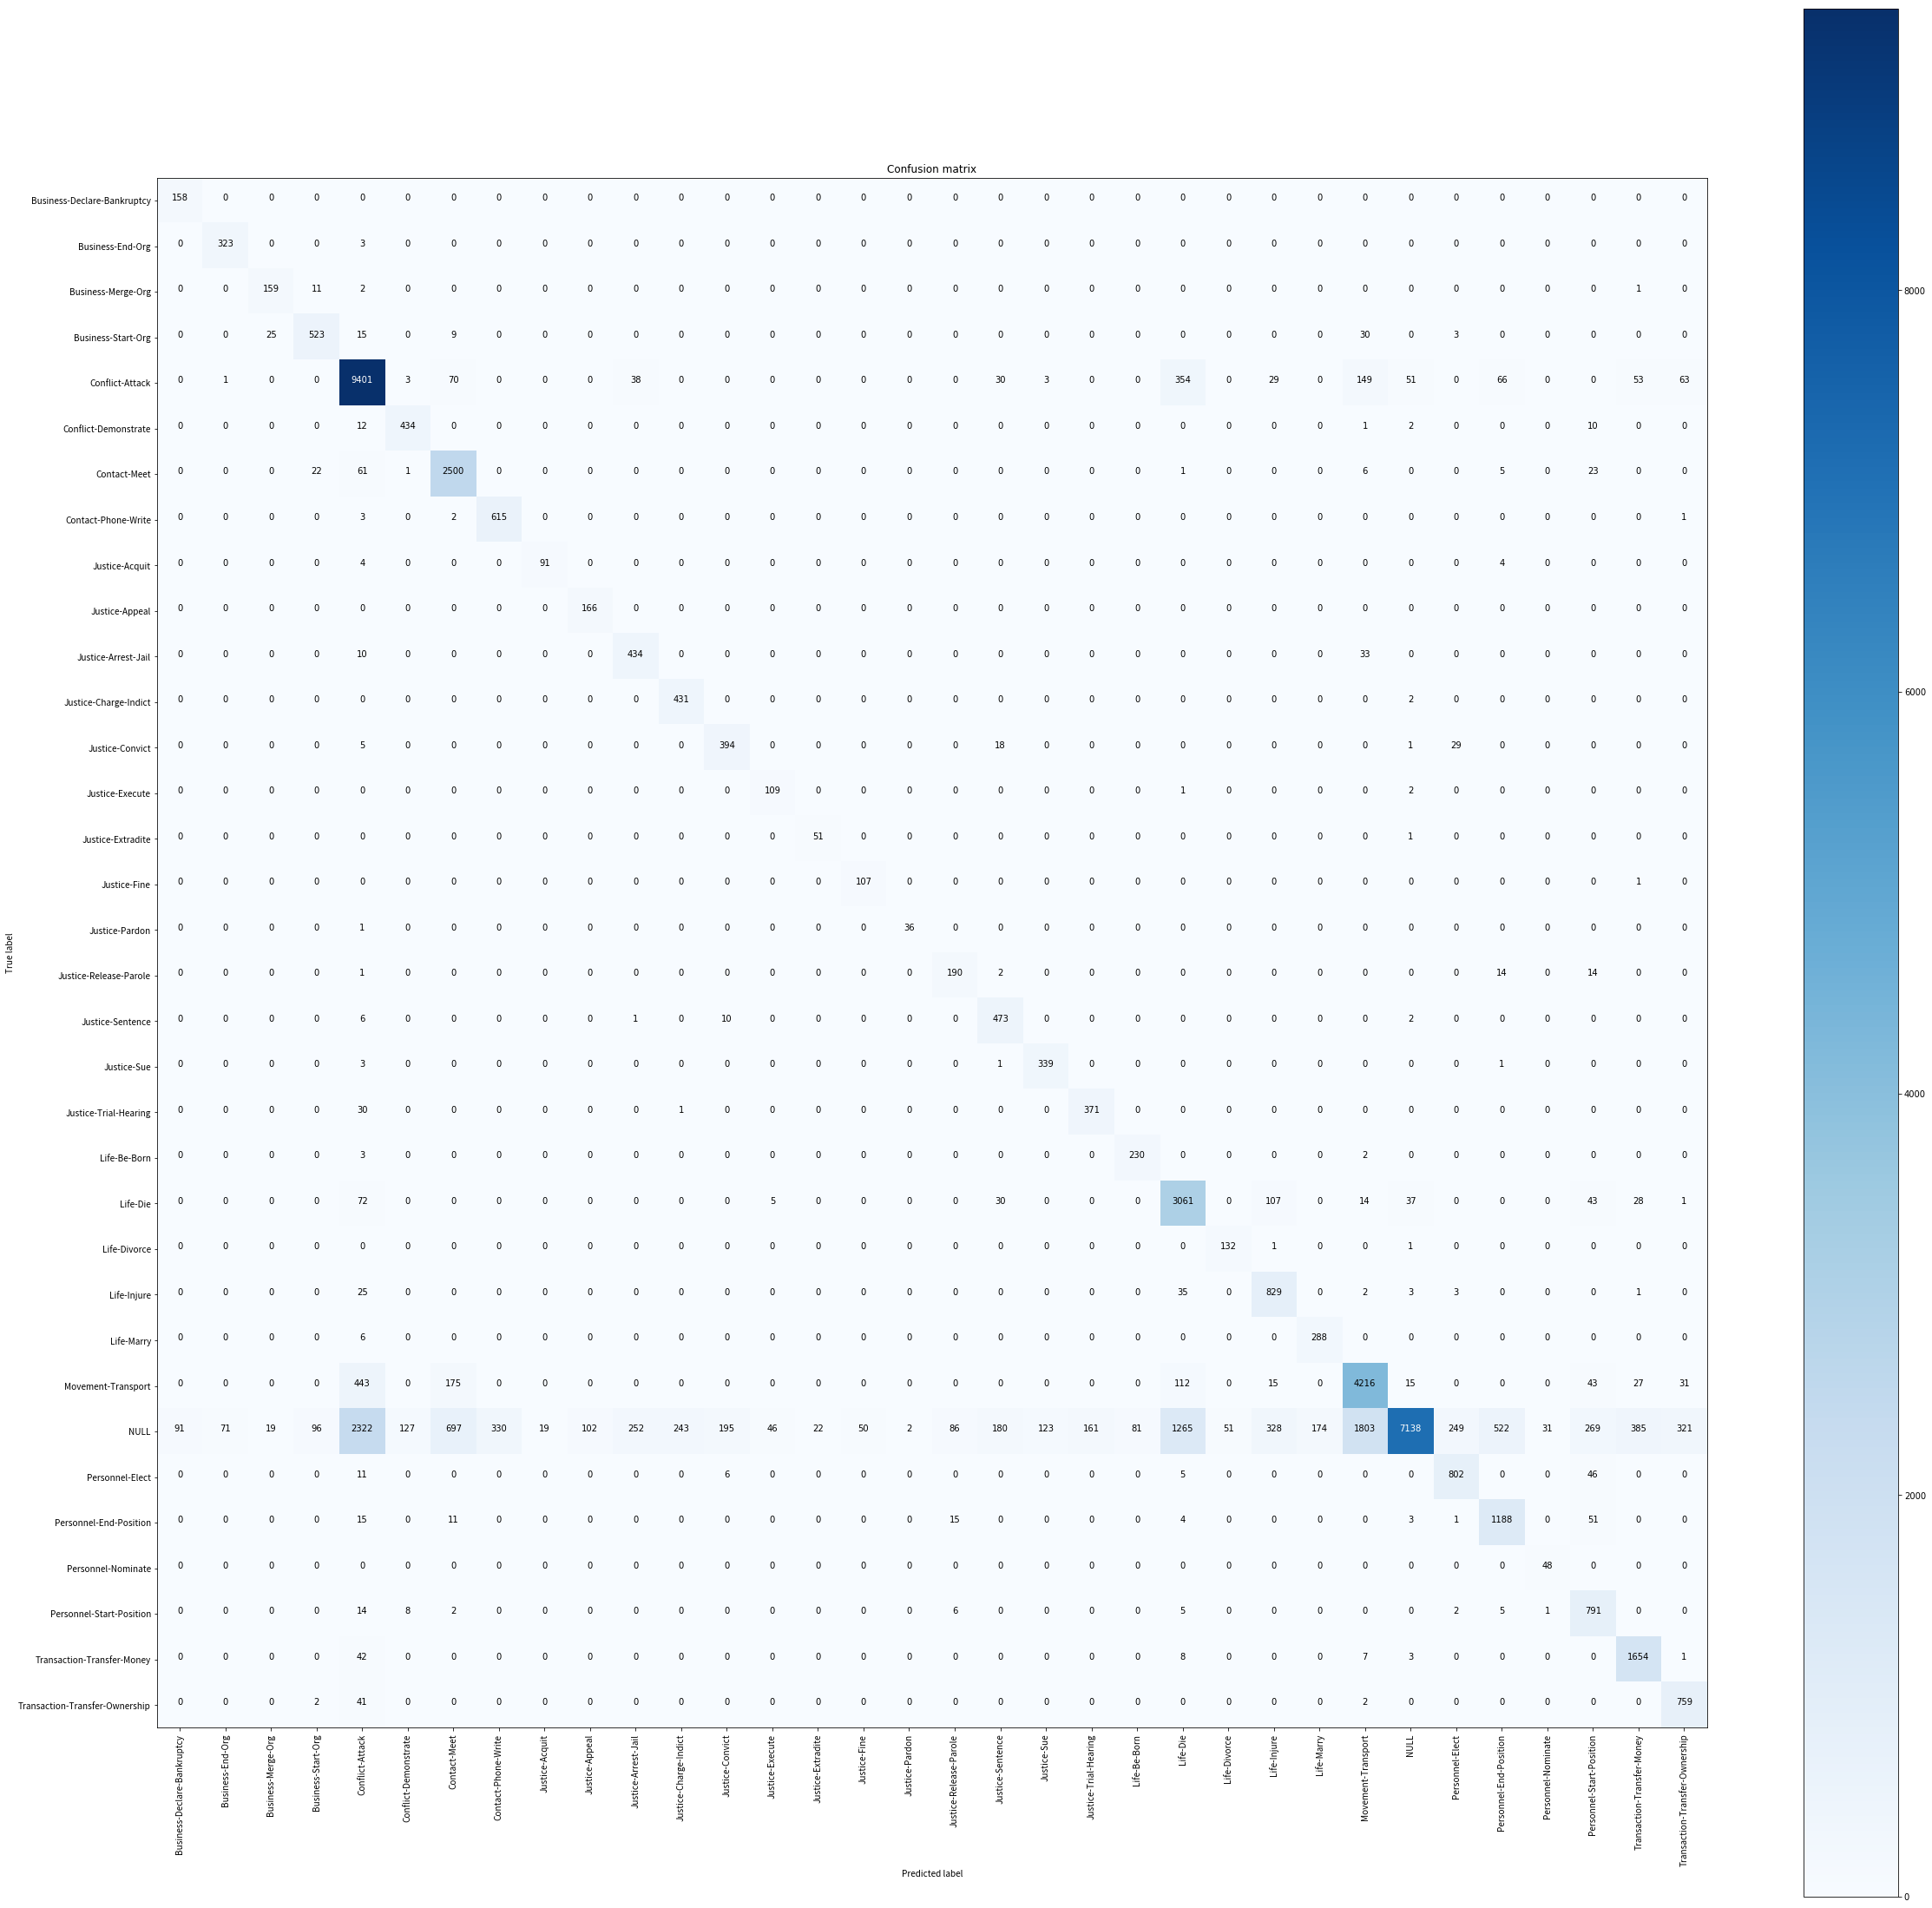

Normalized confusion matrix


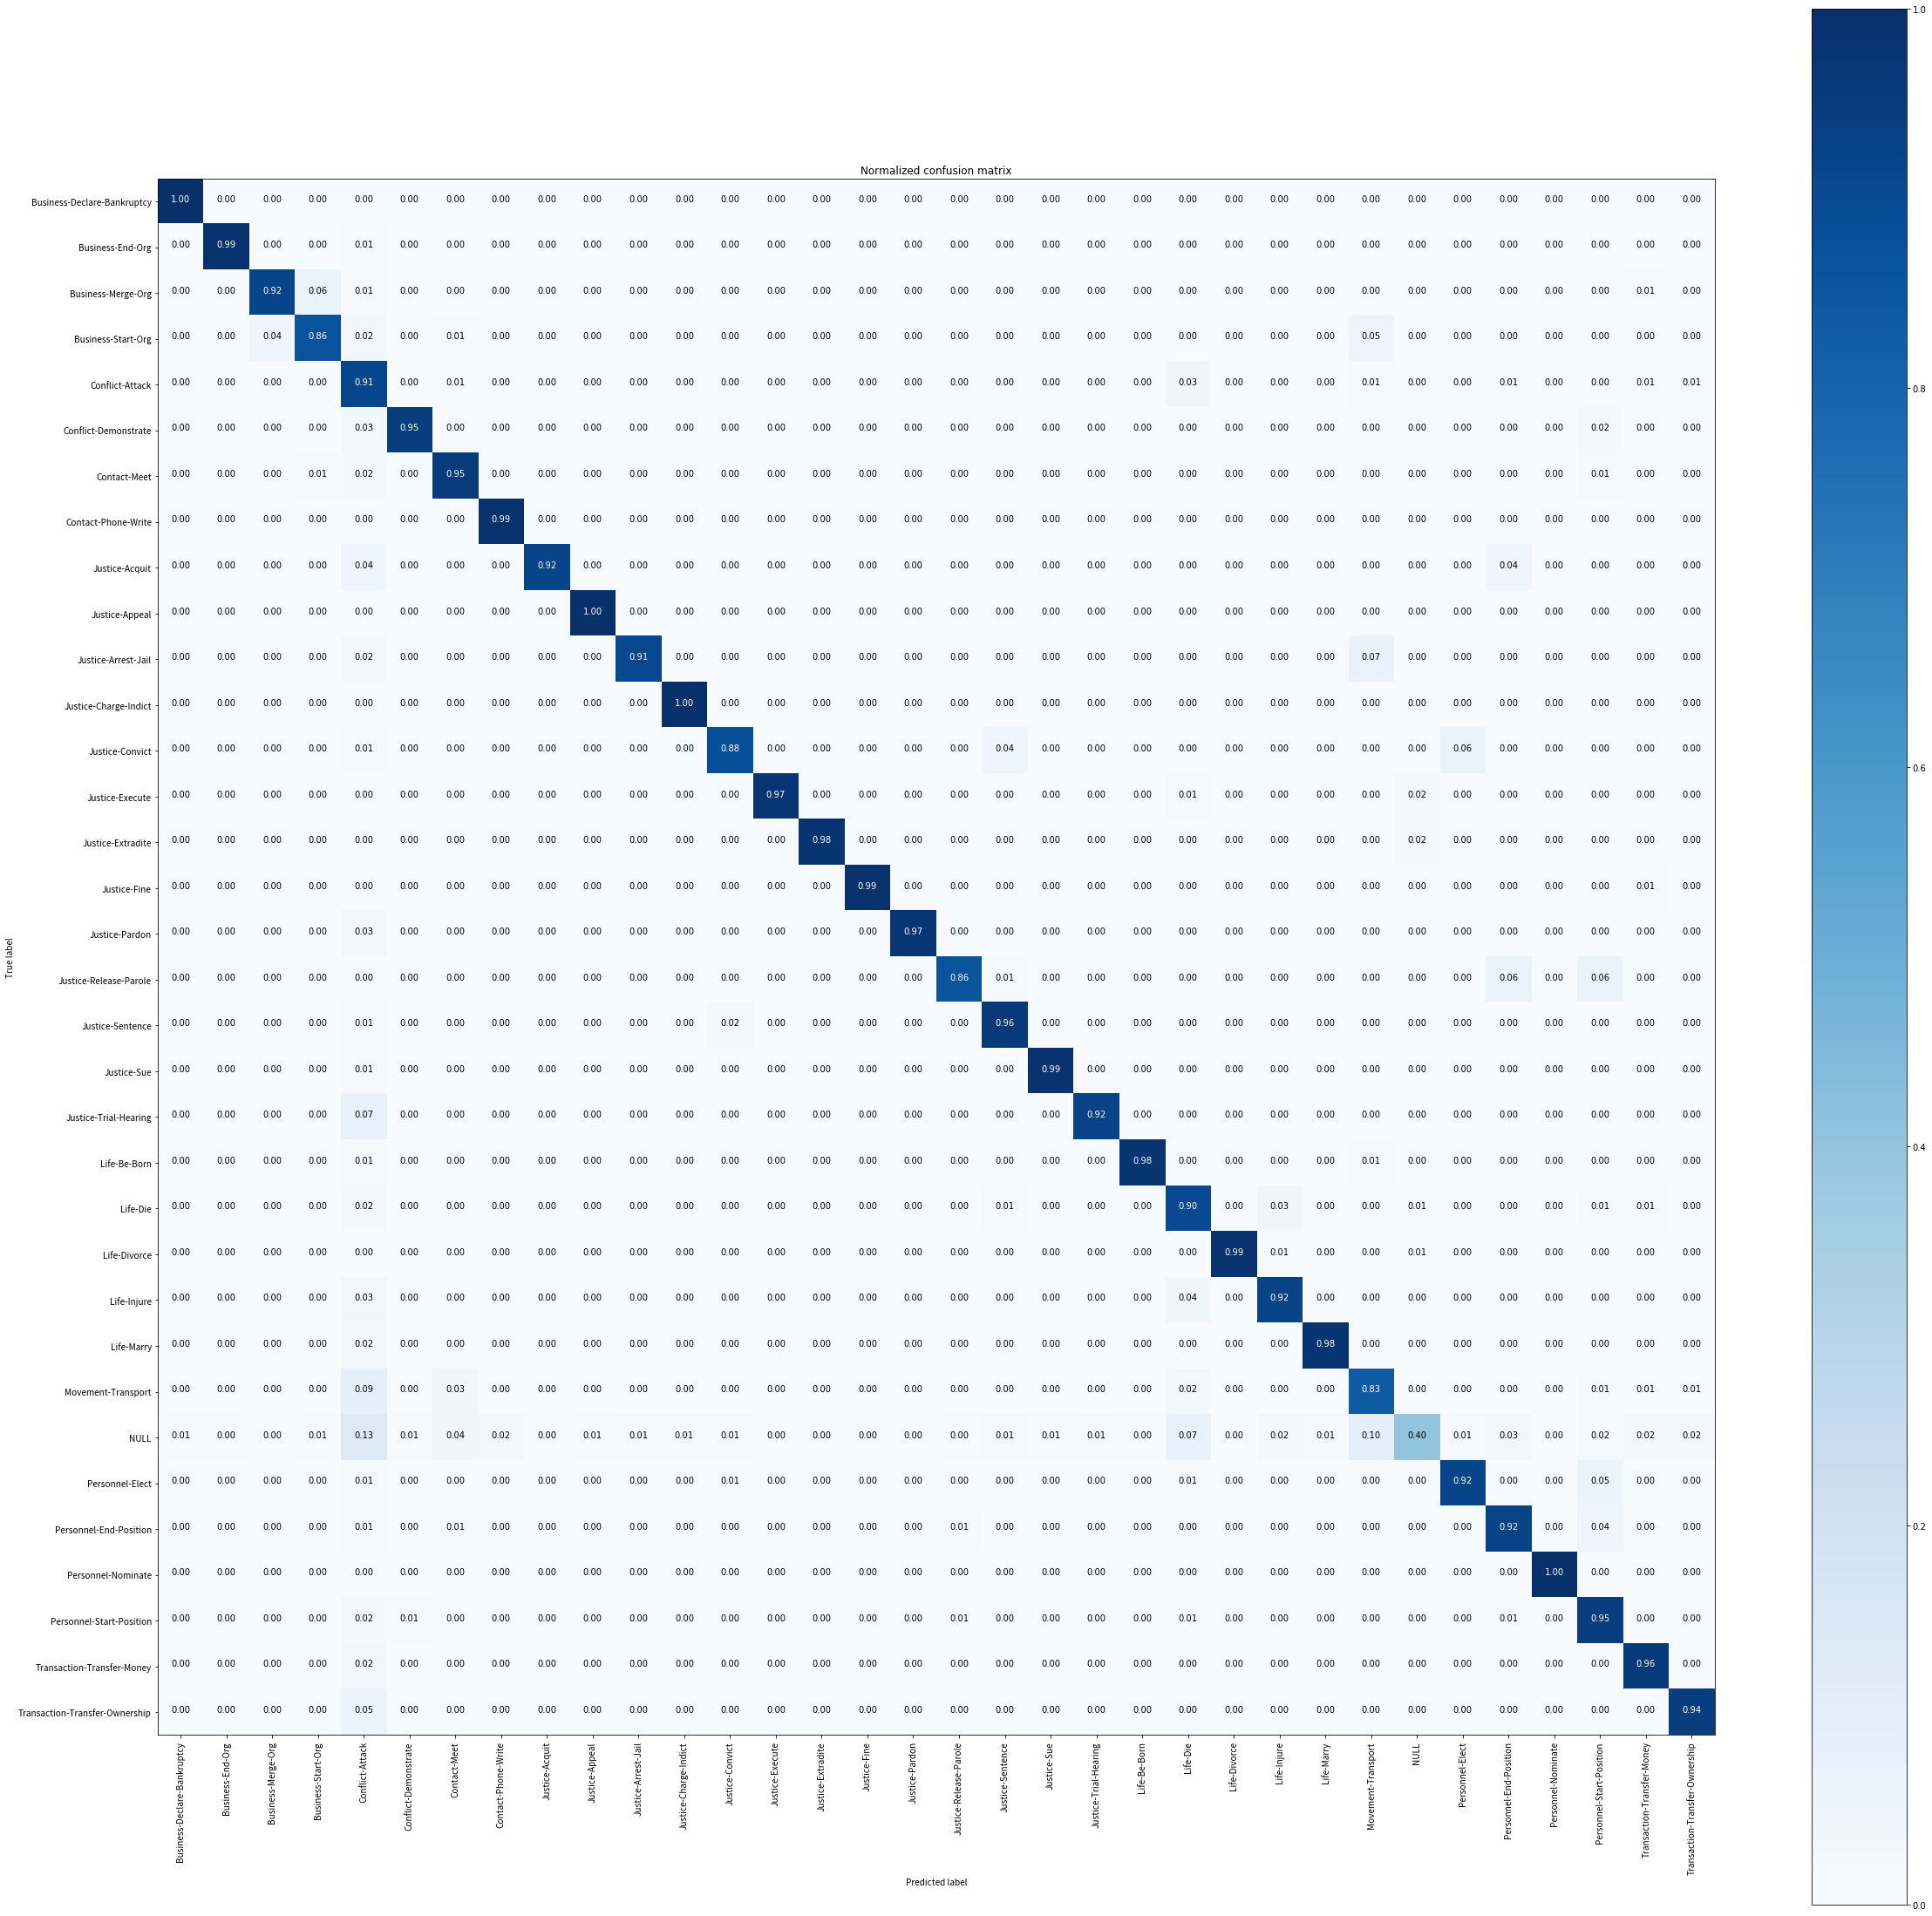

>>evaluating
52108/52108 [==============================] - 1s 21us/step
loss :  0.4124519550708829
accuracy : 0.7377178168419437
>>fit the model on given data, learning_rate:0.01, N_batch:512, N_epoch:71
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 samp

Epoch 53/71
52108/52108 [==============================] - 1s 12us/step - loss: 3.3248 - acc: 0.7364 - val_loss: 0.4092 - val_acc: 0.7384
Epoch 54/71
52108/52108 [==============================] - 1s 17us/step - loss: 3.3342 - acc: 0.7377 - val_loss: 0.4110 - val_acc: 0.7393
Epoch 55/71
52108/52108 [==============================] - 1s 21us/step - loss: 3.3301 - acc: 0.7375 - val_loss: 0.4080 - val_acc: 0.7398
Epoch 56/71
52108/52108 [==============================] - 1s 15us/step - loss: 3.3244 - acc: 0.7383 - val_loss: 0.4107 - val_acc: 0.7391
Epoch 57/71
52108/52108 [==============================] - 1s 23us/step - loss: 3.3231 - acc: 0.7369 - val_loss: 0.4096 - val_acc: 0.7389
Epoch 58/71
52108/52108 [==============================] - 1s 18us/step - loss: 3.3335 - acc: 0.7366 - val_loss: 0.4115 - val_acc: 0.7380
Epoch 59/71
52108/52108 [==============================] - 1s 15us/step - loss: 3.3128 - acc: 0.7378 - val_loss: 0.4085 - val_acc: 0.7397
Epoch 60/71
52108/52108 [=========

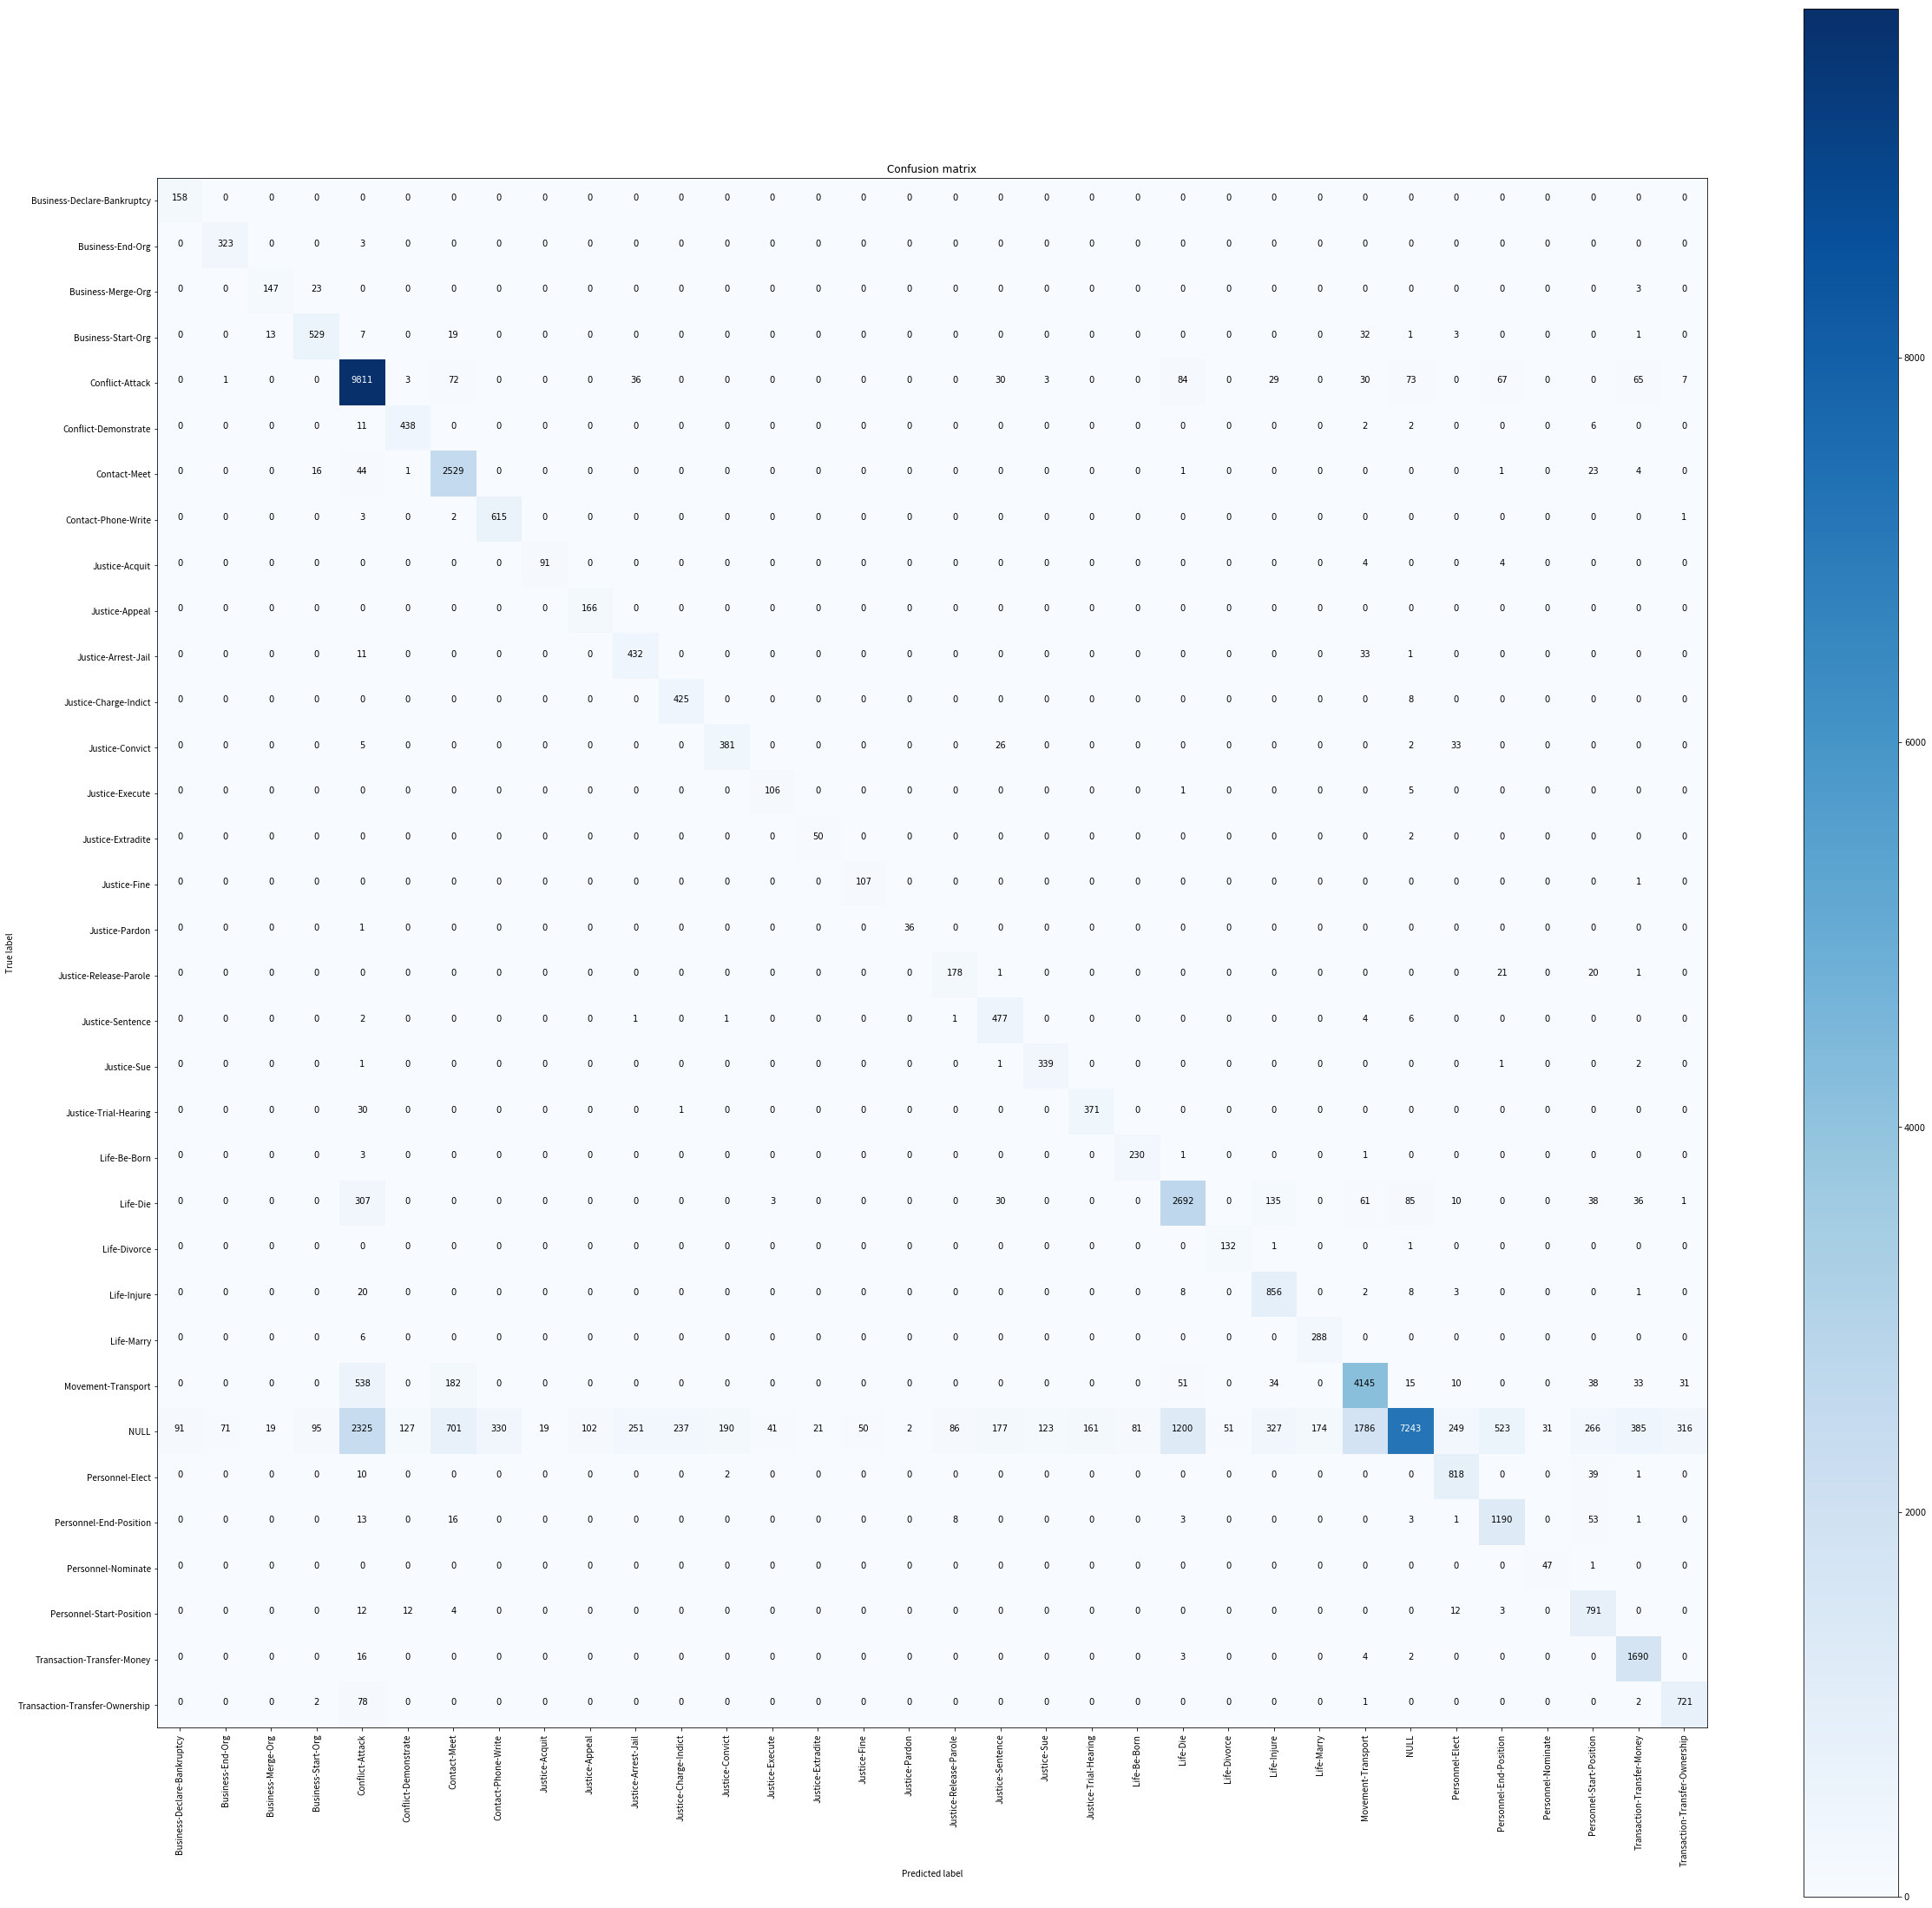

Normalized confusion matrix


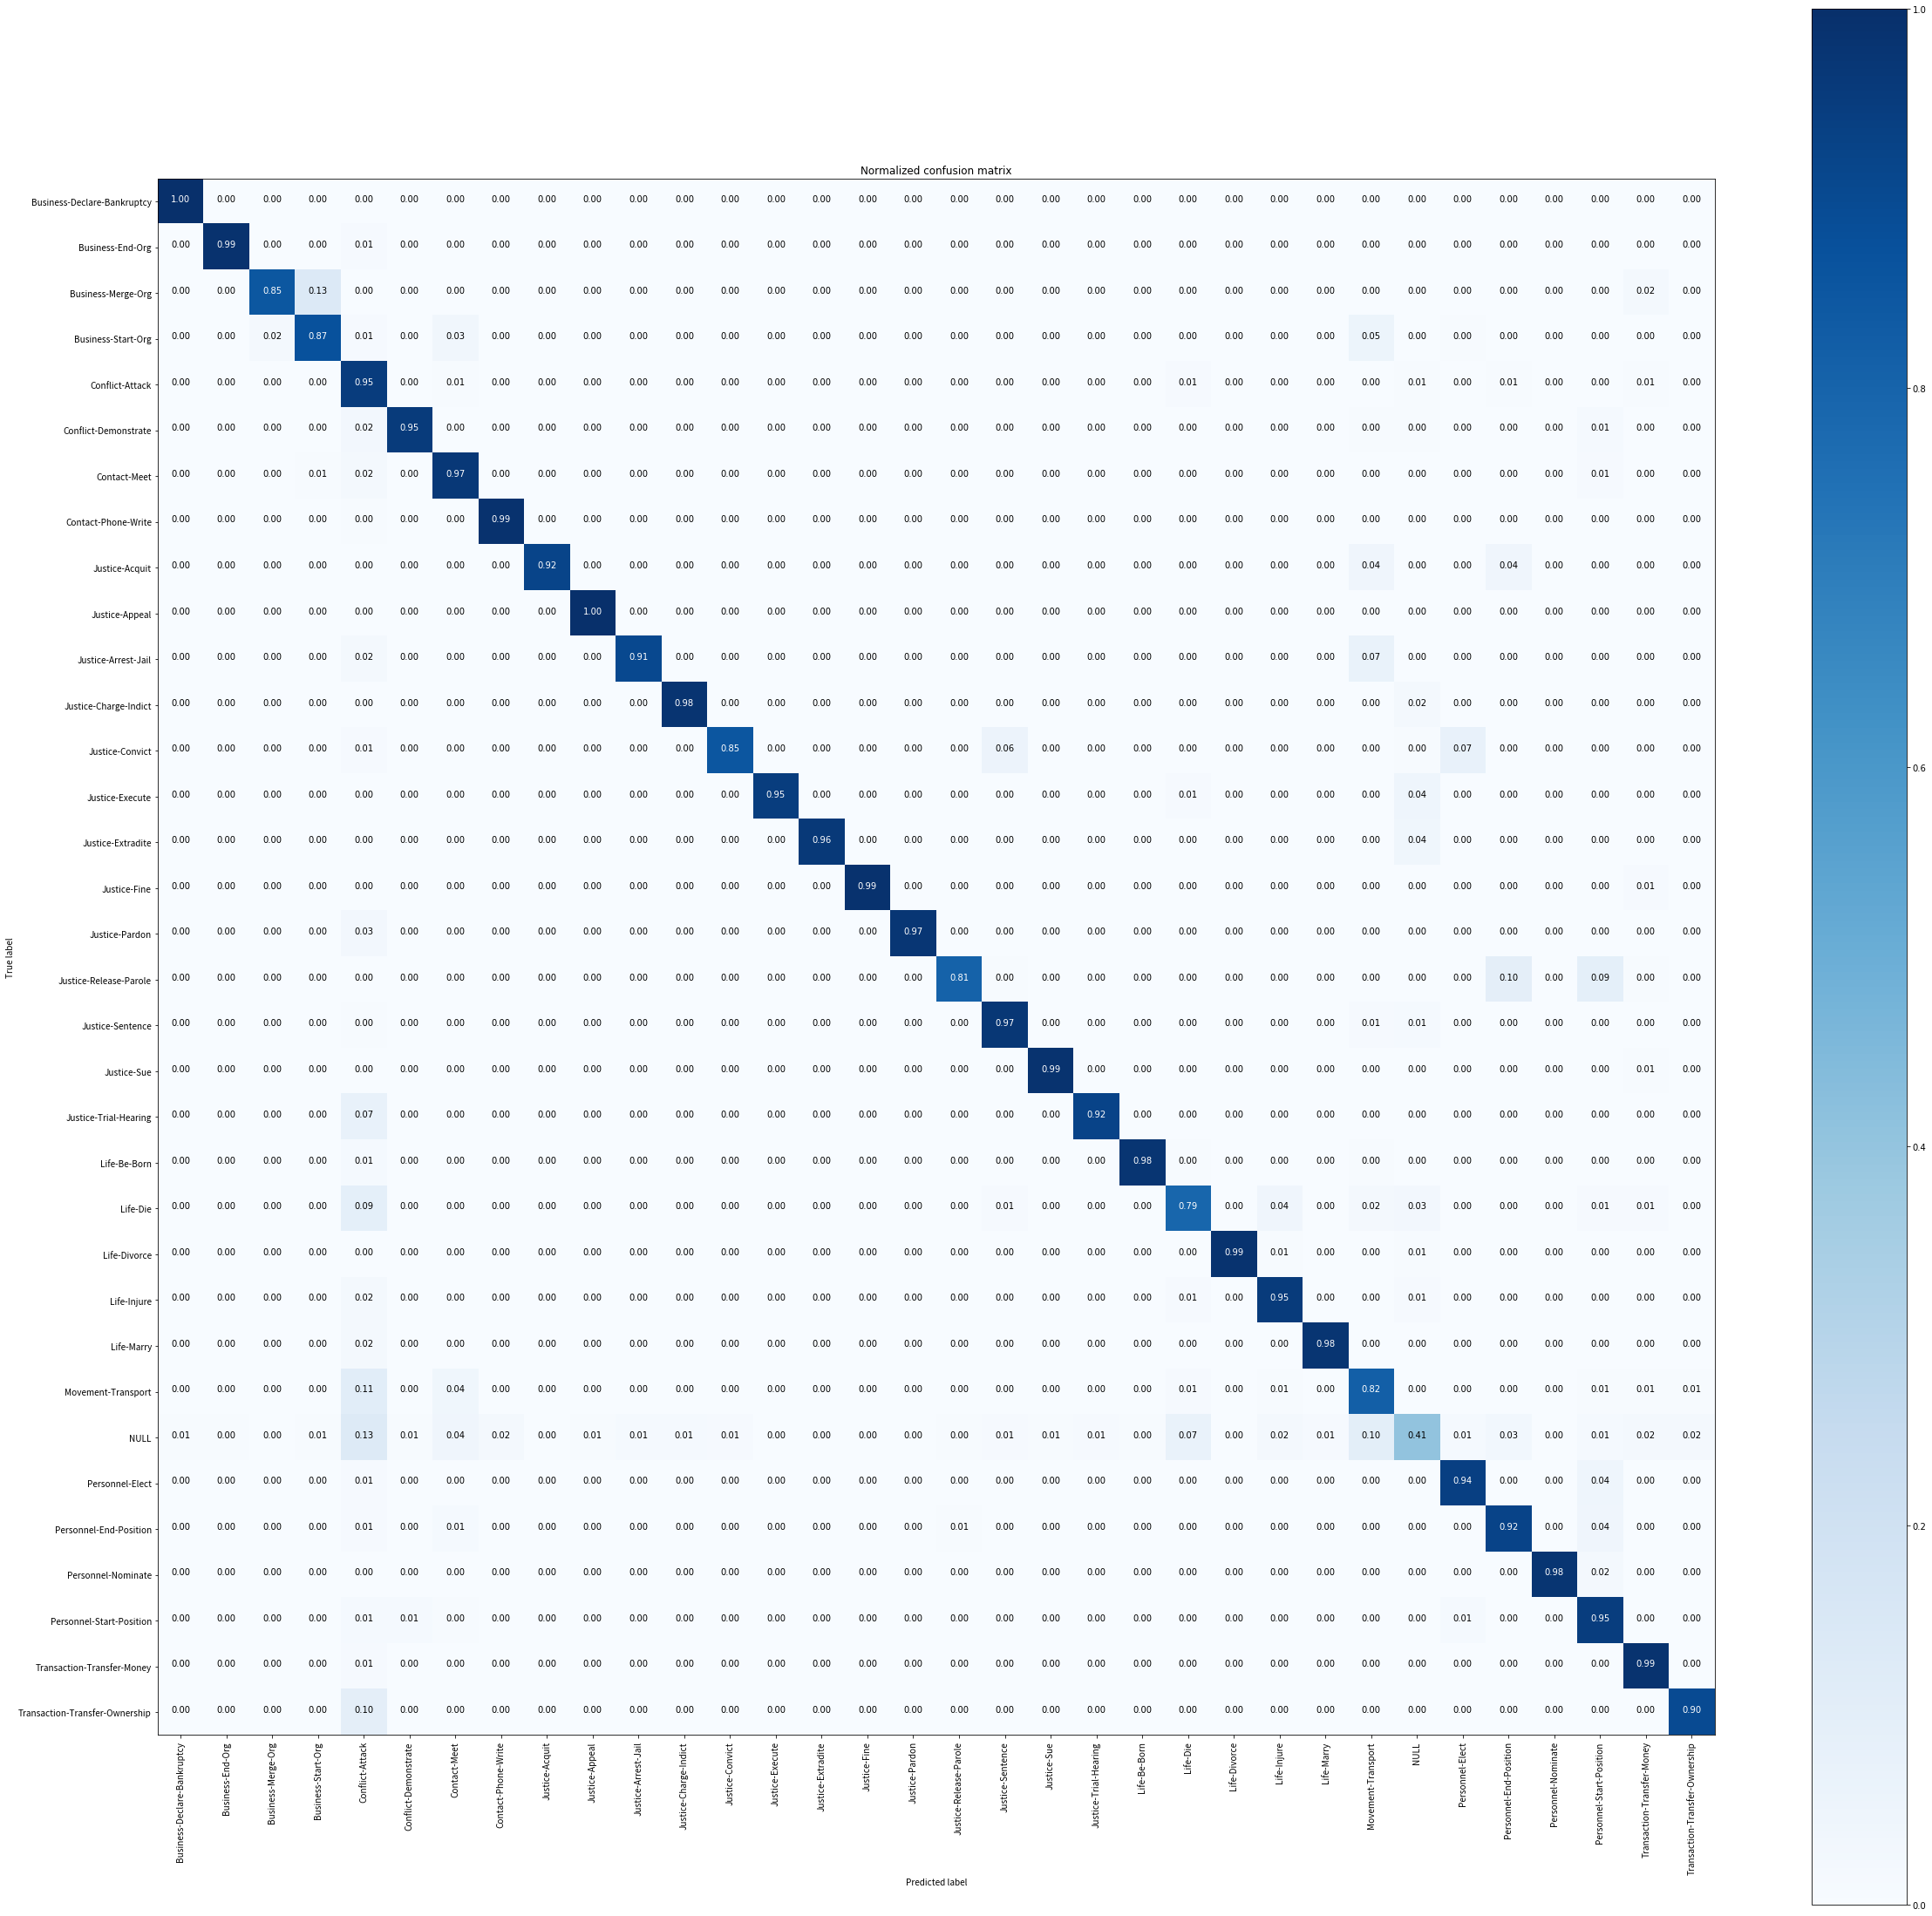

>>evaluating
52108/52108 [==============================] - 1s 22us/step
loss :  0.405614933405828
accuracy : 0.7398480079834191
>>fit the model on given data, learning_rate:0.005, N_batch:512, N_epoch:71
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 samp

Epoch 53/71
52108/52108 [==============================] - 1s 13us/step - loss: 3.2765 - acc: 0.7385 - val_loss: 0.4040 - val_acc: 0.7400
Epoch 54/71
52108/52108 [==============================] - 1s 12us/step - loss: 3.2786 - acc: 0.7382 - val_loss: 0.4025 - val_acc: 0.7410
Epoch 55/71
52108/52108 [==============================] - 1s 18us/step - loss: 3.2864 - acc: 0.7379 - val_loss: 0.4067 - val_acc: 0.7405
Epoch 56/71
52108/52108 [==============================] - 1s 19us/step - loss: 3.2853 - acc: 0.7385 - val_loss: 0.4031 - val_acc: 0.7408
Epoch 57/71
52108/52108 [==============================] - 1s 16us/step - loss: 3.2850 - acc: 0.7382 - val_loss: 0.4046 - val_acc: 0.7408
Epoch 58/71
52108/52108 [==============================] - 1s 20us/step - loss: 3.2819 - acc: 0.7387 - val_loss: 0.4045 - val_acc: 0.7407
Epoch 59/71
52108/52108 [==============================] - 1s 21us/step - loss: 3.2762 - acc: 0.7394 - val_loss: 0.4029 - val_acc: 0.7400
Epoch 60/71
52108/52108 [=========

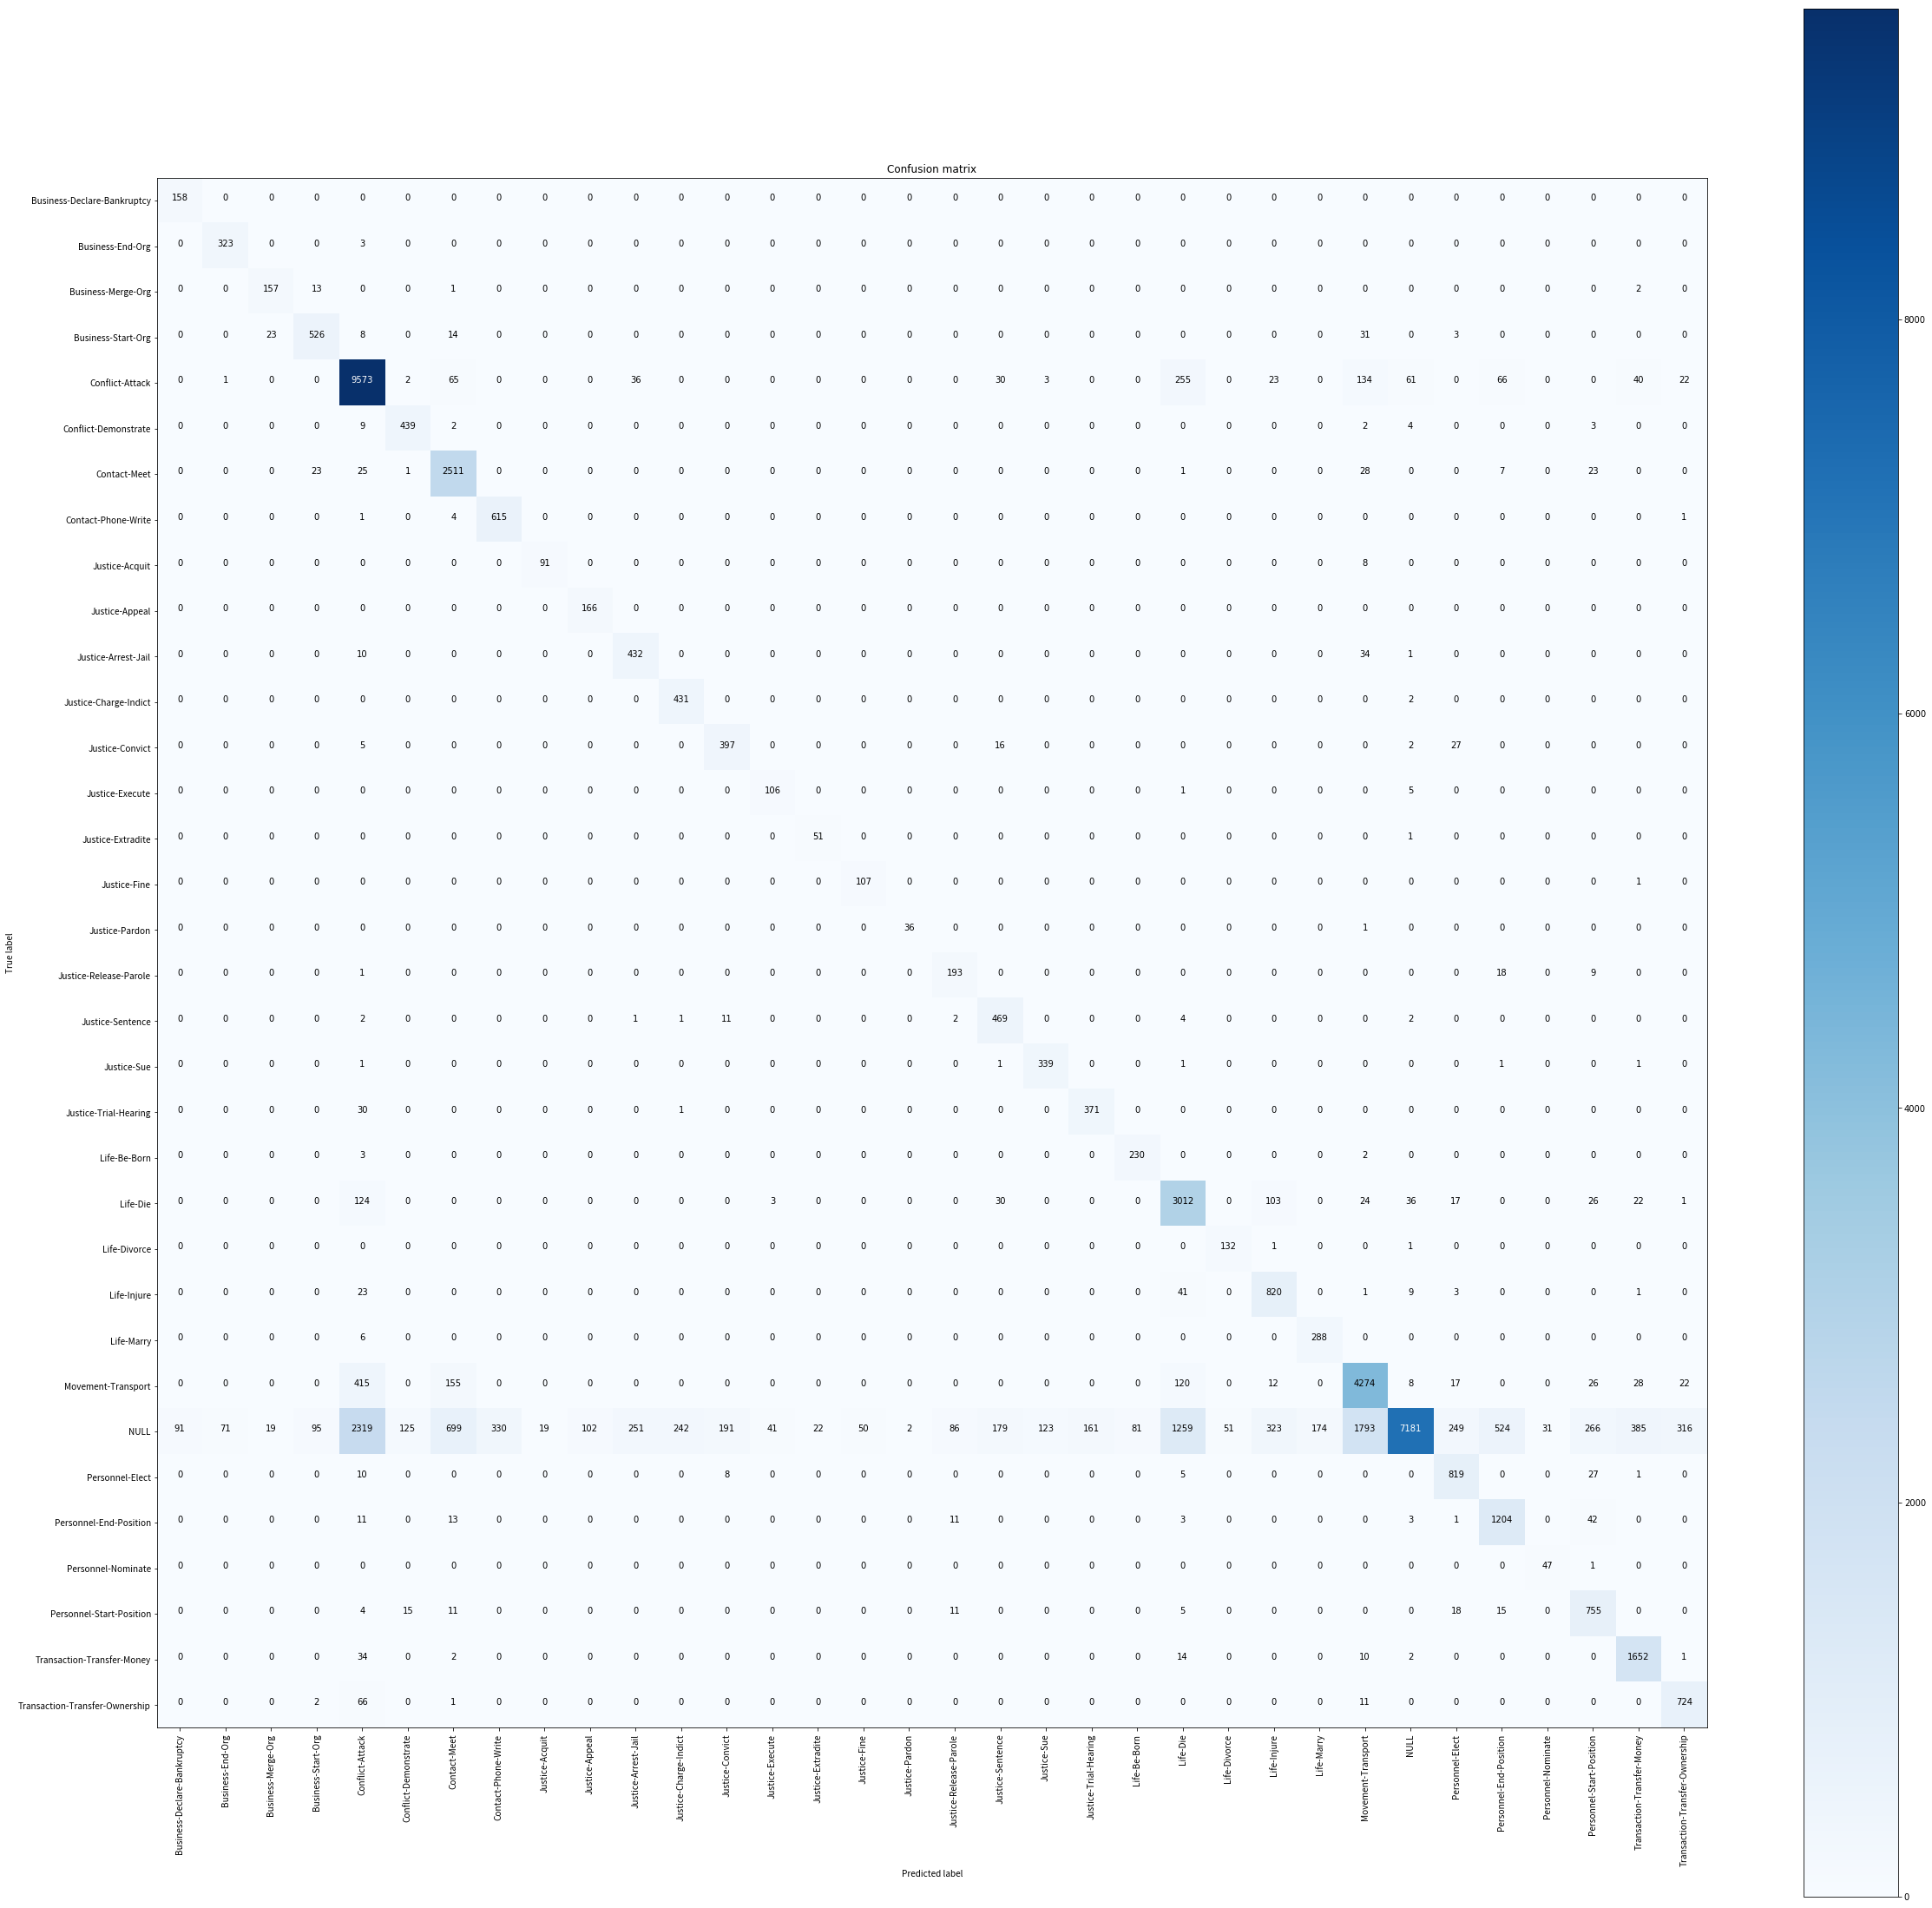

Normalized confusion matrix


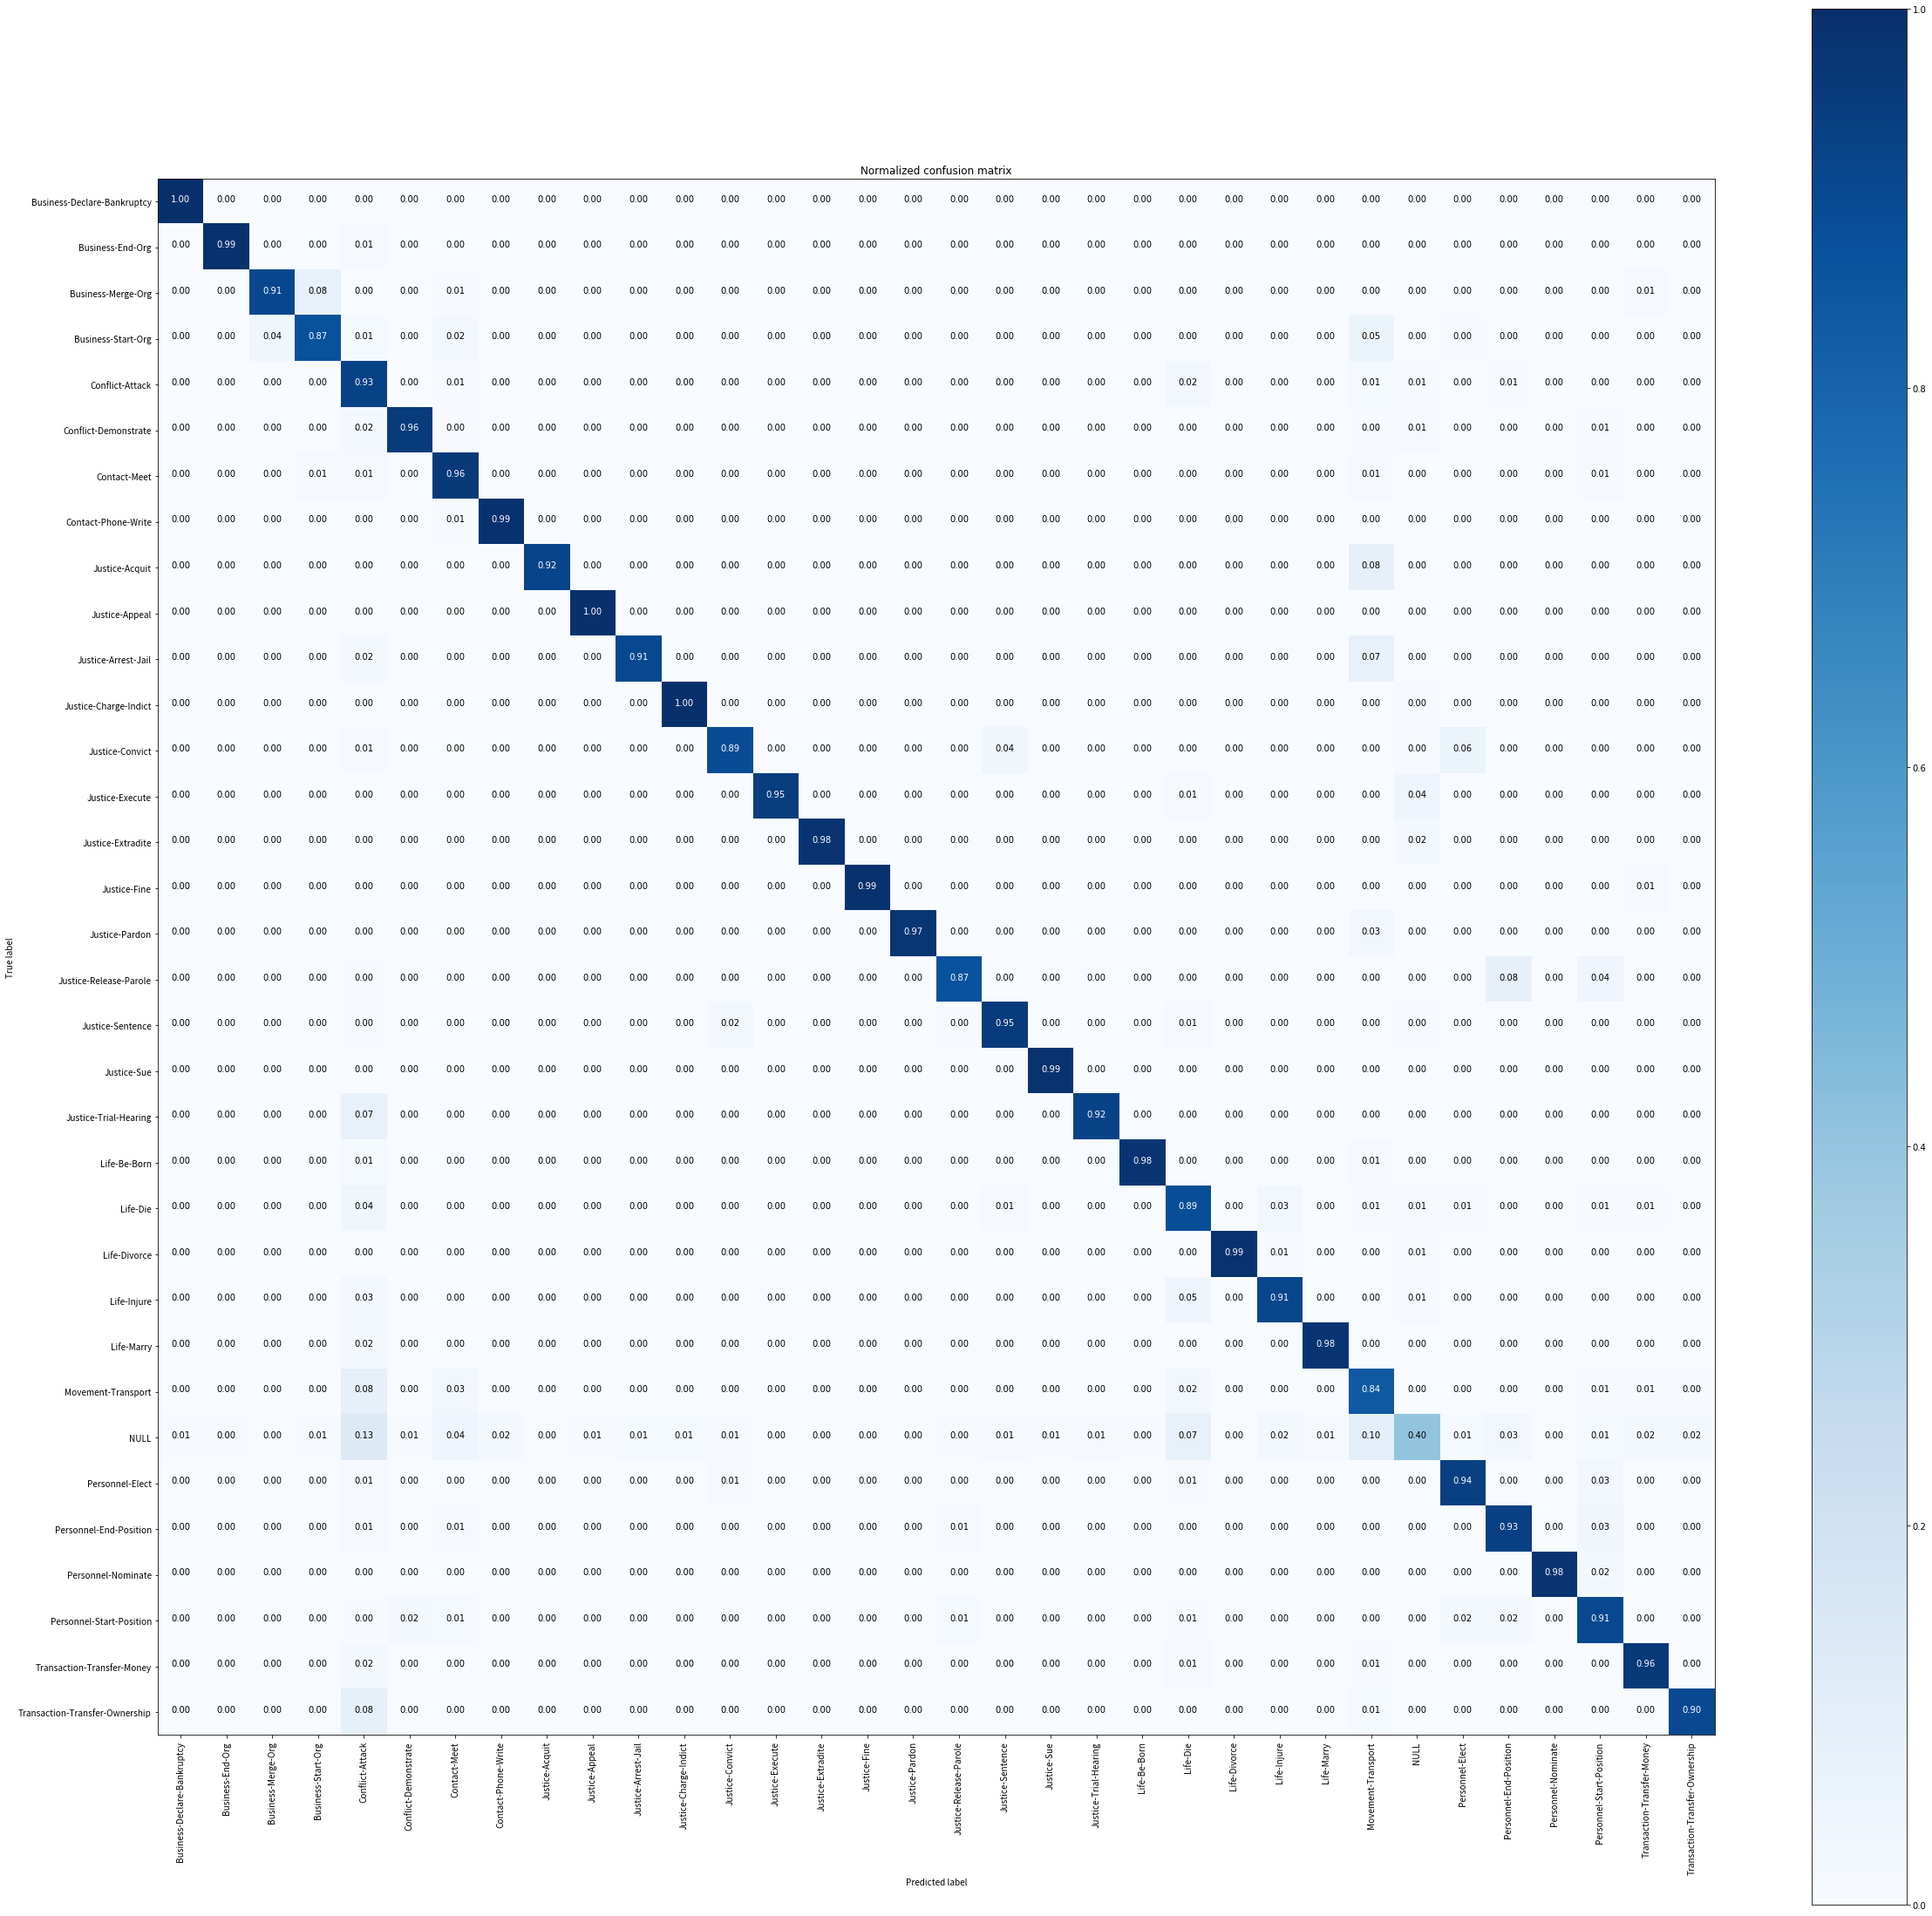

>>evaluating
52108/52108 [==============================] - 1s 23us/step
loss :  0.4009494538674469
accuracy : 0.7413257081446227
>>fit the model on given data, learning_rate:0.01, N_batch:32, N_epoch:17
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 sampl

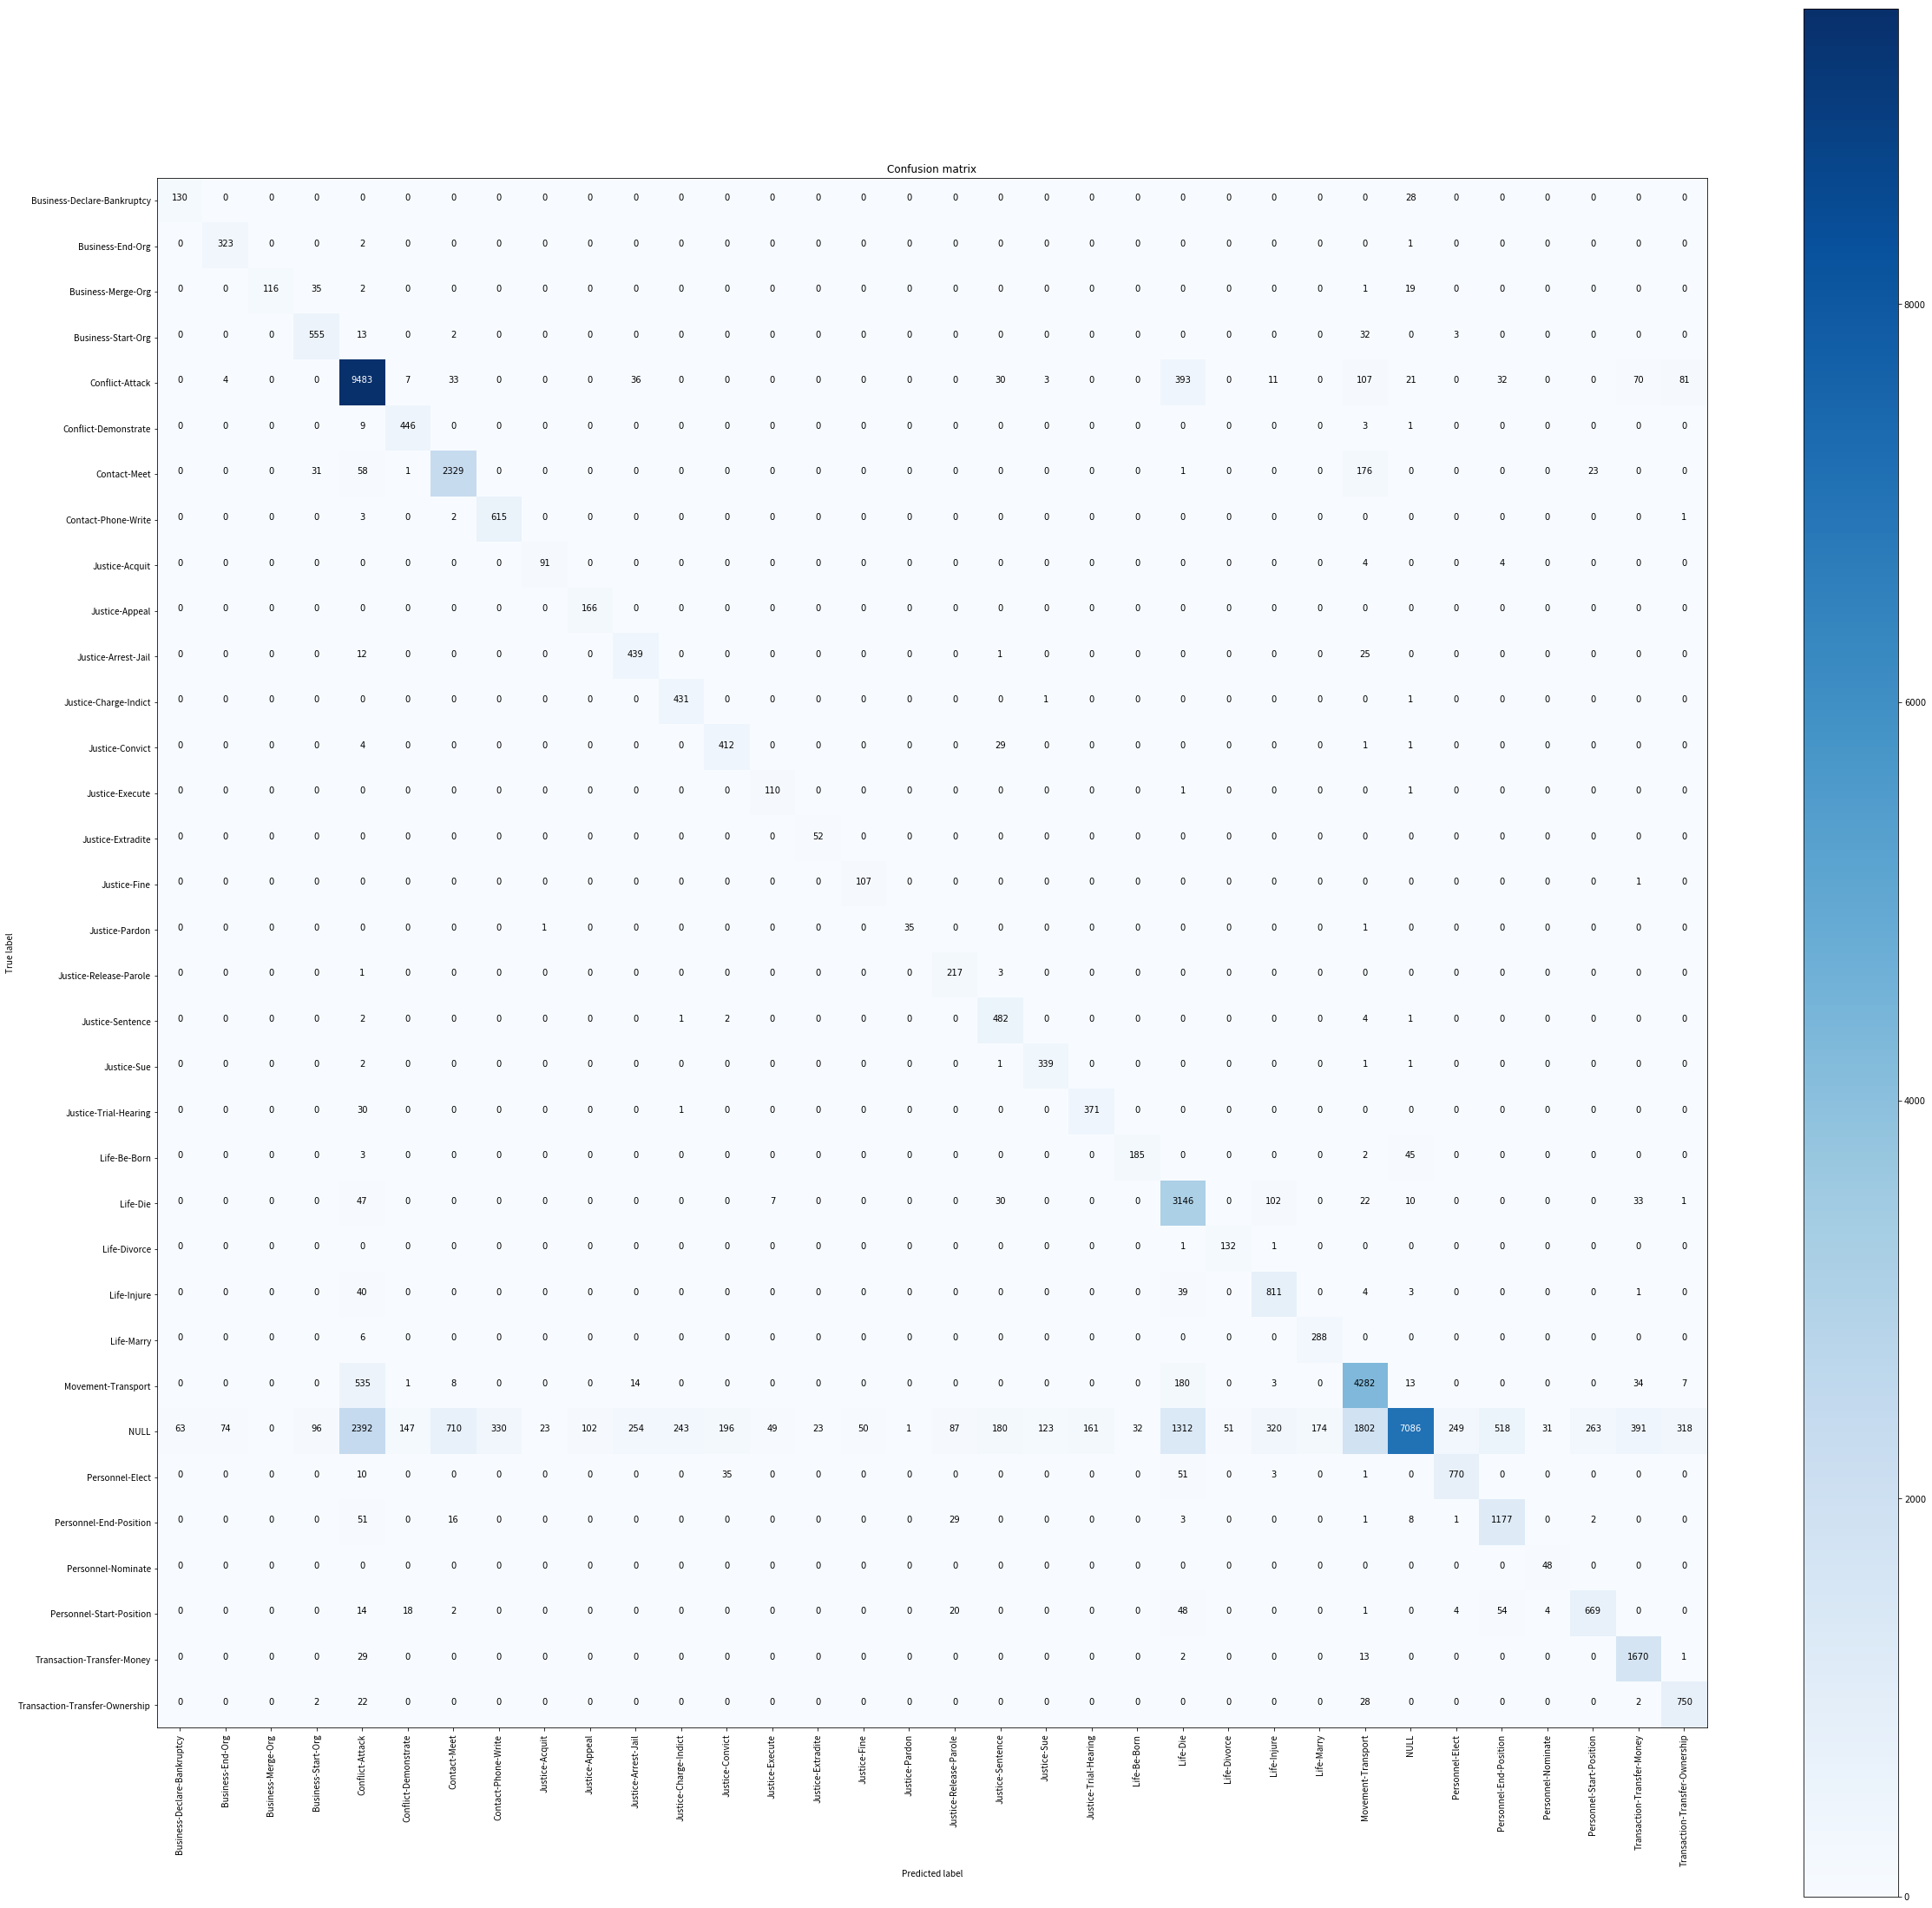

Normalized confusion matrix


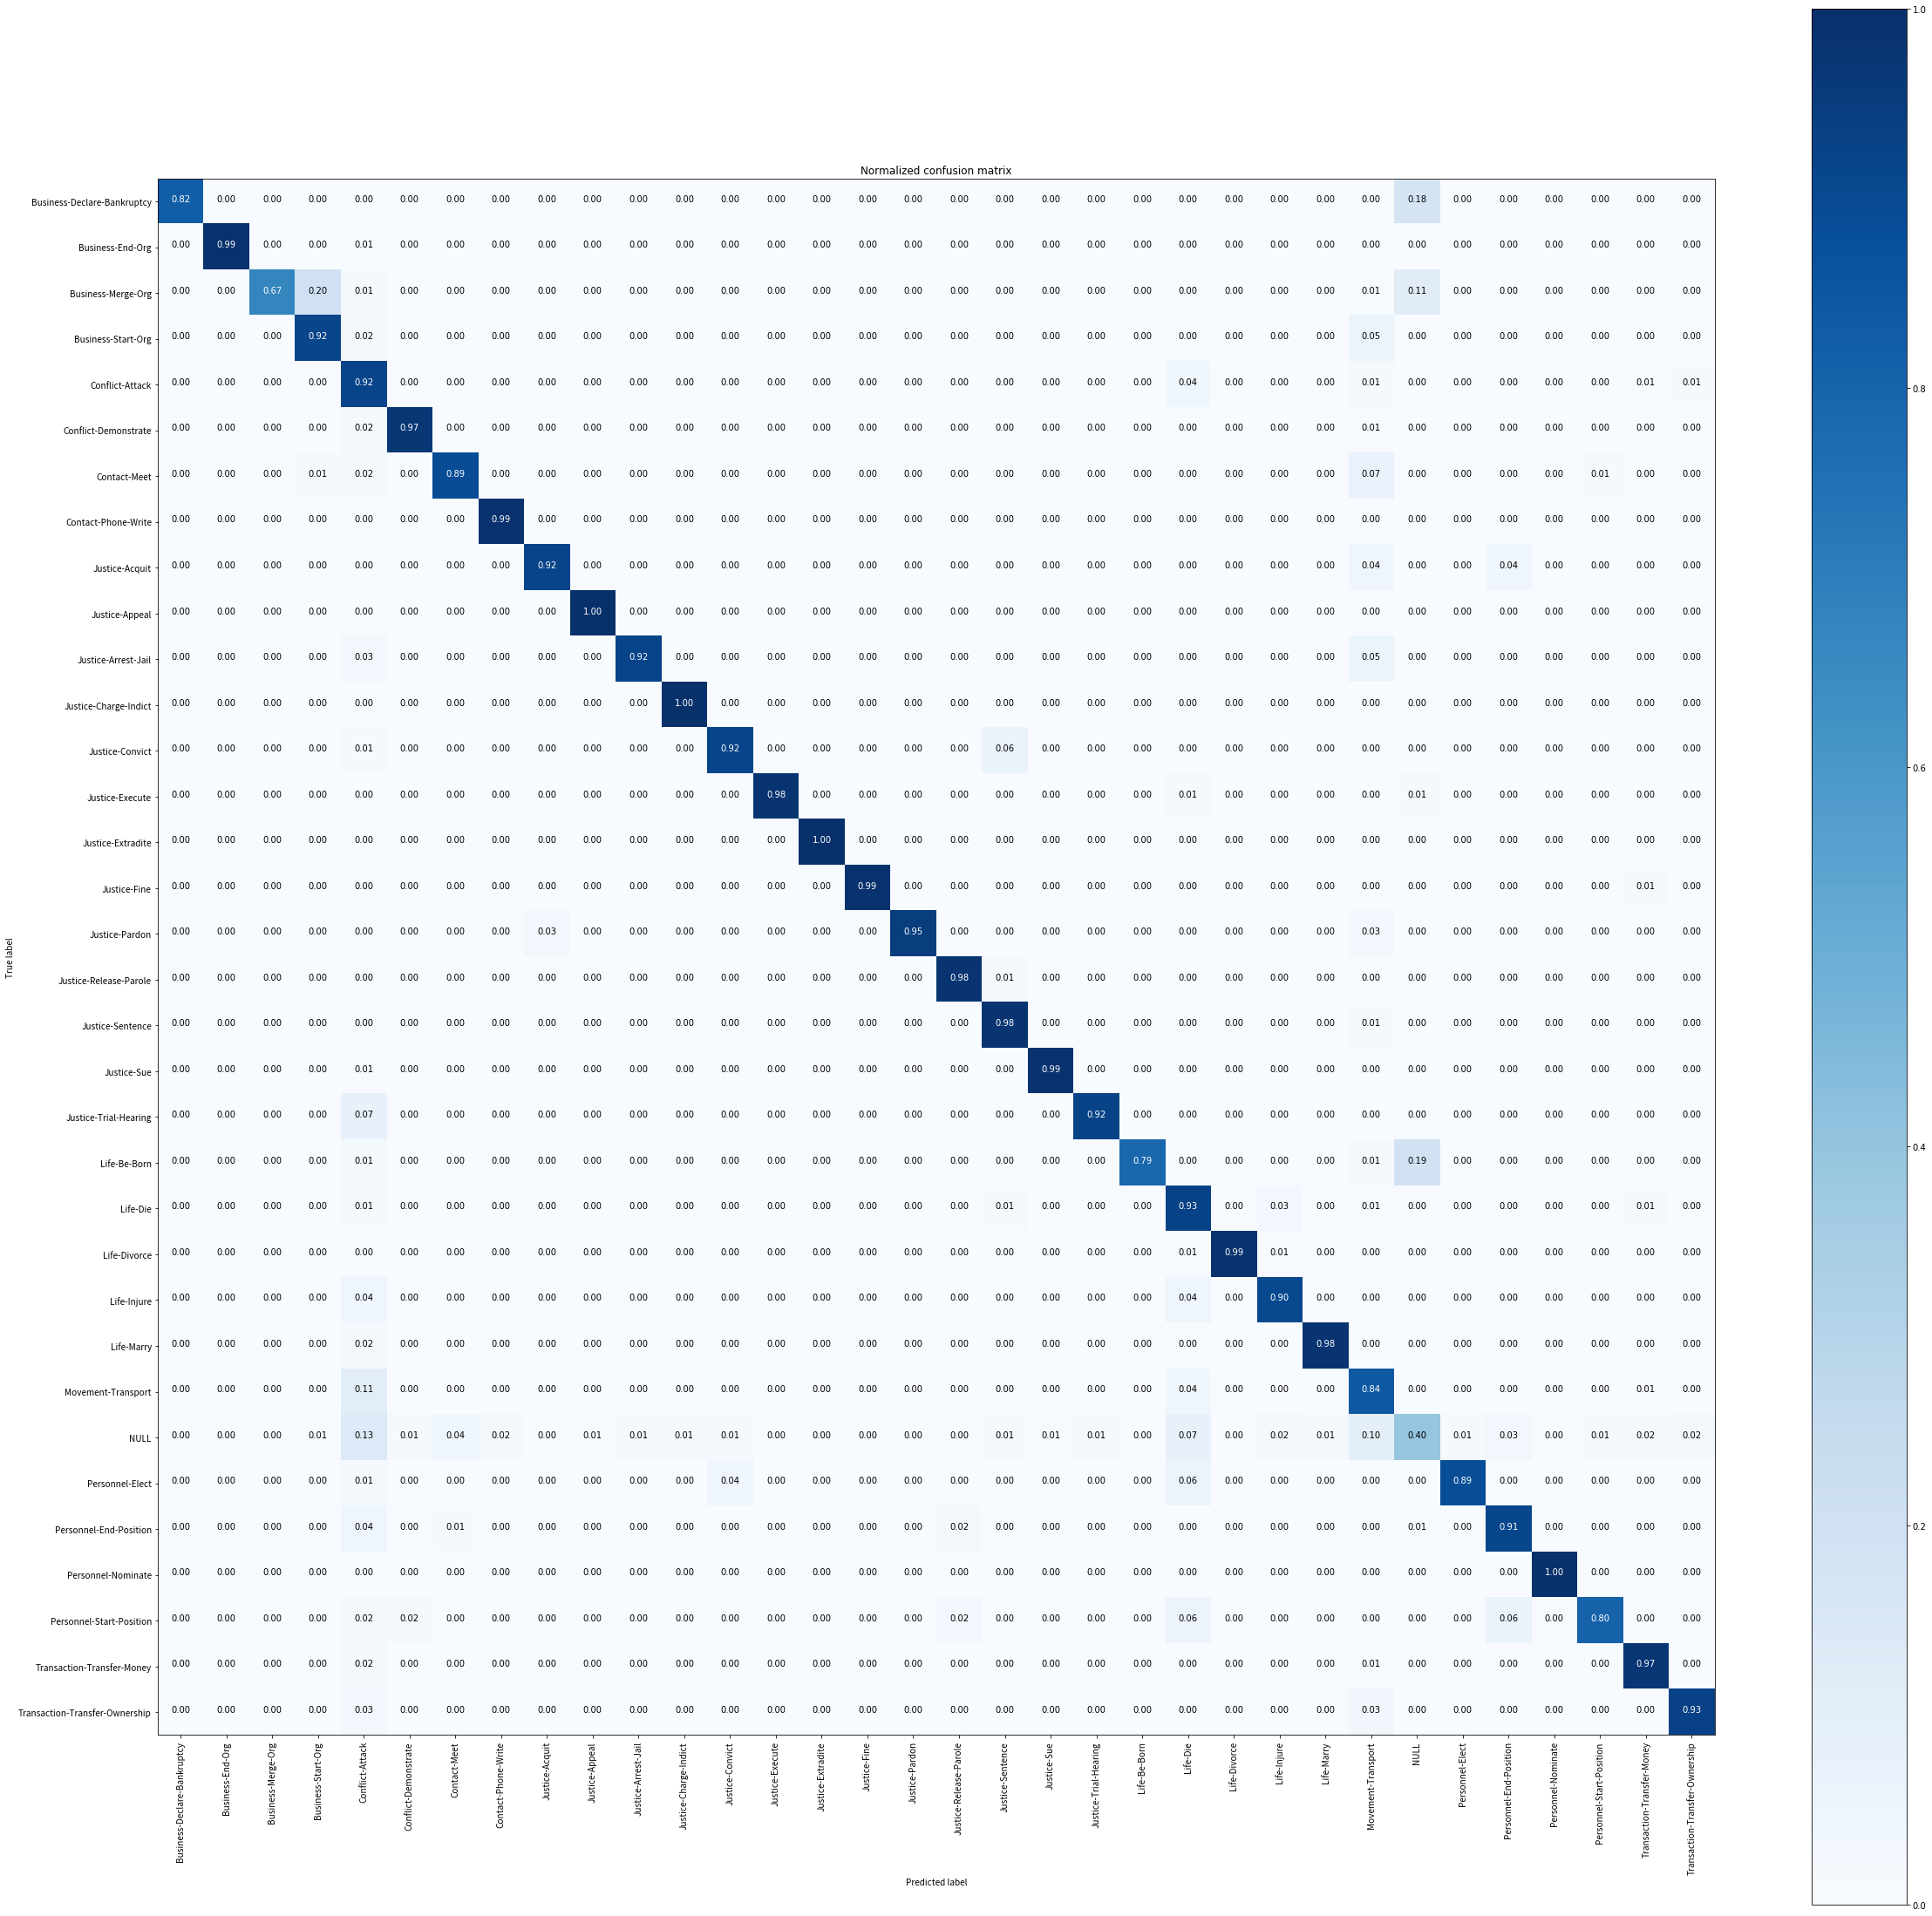

>>evaluating
52108/52108 [==============================] - 1s 23us/step
loss :  0.43040192630920765
accuracy : 0.7343018346511092
>>fit the model on given data, learning_rate:0.01, N_batch:16, N_epoch:16
samples shape: (52108, 768)
labels number: 34 {'Justice-Release-Parole', 'Business-Declare-Bankruptcy', 'Justice-Extradite', 'Justice-Sentence', 'NULL', 'Justice-Charge-Indict', 'Personnel-Elect', 'Life-Die', 'Business-Merge-Org', 'Conflict-Attack', 'Contact-Meet', 'Justice-Appeal', 'Conflict-Demonstrate', 'Personnel-Start-Position', 'Justice-Arrest-Jail', 'Life-Injure', 'Justice-Acquit', 'Justice-Sue', 'Personnel-End-Position', 'Transaction-Transfer-Ownership', 'Justice-Trial-Hearing', 'Life-Divorce', 'Life-Marry', 'Life-Be-Born', 'Movement-Transport', 'Justice-Pardon', 'Justice-Execute', 'Business-Start-Org', 'Contact-Phone-Write', 'Business-End-Org', 'Justice-Convict', 'Transaction-Transfer-Money', 'Justice-Fine', 'Personnel-Nominate'}
Train on 52108 samples, validate on 52108 samp

KeyboardInterrupt: 

In [4]:

print('='*65,'\n>>trigger model training:')
try:
    model_trig, encoder_trig = joblib.load(file_model_trig)
    acc_pre = test_on_data(model_trig, encoder_trig, vec_trig, label_trig, en_verbose = 0)
except:
    # model define
    input_dim = np.asarray(vec_trig).shape[1]
    N_classes = len(set(label_trig))
    model_trig = create_base_network(input_dim, N_classes)
    encoder_trig = LabelEncoder()
    encoder_trig.fit(label_trig)
    acc_pre = 0
    
N_batchs =[2048, 1024, 512, 32, 16, 8]
lrs = [0.01, 0.0001]
for lr in lrs:
    for N_batch in N_batchs:
        Times_training, N_batch, N_epoch, en_verbose = 3, N_batch, max(16, int(np.floor(np.sqrt(10*N_batch)))), 1
        for times in range(1, Times_training):
            the_lr = lr/times
            model_trig, encoder_trig, his = fit_on_data(vec_trig, label_trig, model_trig, encoder_trig, 
                                                        the_lr, N_batch = N_batch, N_epoch = N_epoch, en_verbose = en_verbose)
            print('acc:{}'.format(his.history['acc'][-1]))
            val_acc = test_on_data(model_trig, encoder_trig, vec_trig, label_trig, en_verbose = en_verbose)
            joblib.dump([model_trig,encoder_trig], '{}_{:.5f}_{:.5f}_{:.5f}_{:.5f}.pkl'.format(
                file_model_trig[0:-4], his.history['acc'][-1], val_acc, the_lr, N_batch)) # save the model to disk
            if val_acc > acc_pre:
                acc_pre = val_acc
                joblib.dump([model_trig,encoder_trig], '{}.pkl'.format(file_model_trig[0:-4])) # save the model to disk
            else:
                break

In [ ]:
print('='*65,'\n>>argument model training:')
try:
    triggers, vec_trig, label_trig = None, None, None
    triggers, vec_trig, label_trig, args, vec_arg, label_arg = joblib.load(NAME_DATA_FILE)
    triggers, vec_trig, label_trig = None, None, None
    model_arg, encoder_arg = joblib.load(file_model_arg)
    acc_pre = test_on_data(model_arg, encoder_arg, vec_arg, label_arg, en_verbose = 0)
except:
    encoder_arg = LabelEncoder()
    encoder_arg.fit(label_arg)
    # model define
    input_dim = np.asarray(vec_arg).shape[1]
    N_classes = len(set(label_arg))
    model_arg = create_base_network(input_dim, N_classes)
    acc_pre = 0

for lr in lrs:
    for N_batch in N_batchs:
        Times_training, N_batch, N_epoch, en_verbose = 3, N_batch, max(16, int(np.floor(np.sqrt(10*N_batch)))), 1
        for times in range(1, Times_training):
            the_lr = lr/times
            model_arg, encoder_arg, his = fit_on_data(vec_arg, label_arg, model_arg, encoder_arg, 
                                                      the_lr, N_batch = N_batch, N_epoch = N_epoch, en_verbose = en_verbose)
            print('acc:{}'.format(his.history['acc'][-1]))
            val_acc = test_on_data(model_arg, encoder_arg, vec_arg, label_arg, en_verbose = en_verbose)
            joblib.dump([model_arg,encoder_arg], '{}_{:.5f}_{:.5f}_{:.5f}_{:.5f}.pkl'.format(
                file_model_arg[0:-4], his.history['acc'][-1], val_acc, the_lr, N_batch)) # save the model to disk
            if val_acc > acc_pre:
                acc_pre = val_acc
                joblib.dump([model_arg,encoder_arg], '{}.pkl'.format(file_model_arg[0:-4])) # save the model to disk
            else:
                break

In [ ]:
# error analysis and Retrain
label_pred =  np.argmax(probs, axis=1)
label_true = np.argmax(Y_encoder, axis=1)
predict_diff = abs(label_pred - label_true)
idx_diff = np.where(predict_diff>0)
print(idx_diff[0])
for idx in idx_diff[0]:
    print(idx, '\t', spans[idx], '\t', wordslabel[idx], '\t', words[idx])

Times_wrong =  40
data_wrong = np.tile(wordsvec[idx_diff[0]], (Times_wrong, 1))
label_wrong = np.tile(Y_encoder[idx_diff[0]], (Times_wrong, 1))
data_retrain = np.append(wordsvec, data_wrong, axis = 0)
label_retrain = np.append(Y_encoder, label_wrong, axis =0)
print(data_retrain.shape, label_retrain.shape)



X_train, X_test, Y_train, Y_test = train_test_split(data_retrain, label_retrain, random_state=0)

# model define
N_batch = 8
N_epoch = 100
en_verbose = 0
input_dim = wordsvec.shape[1]
N_classes = len(set(wordslabel))

model = create_base_network(input_dim, N_classes)
model.summary()

# model training
print('='*65,'\n>>training')
start   = time.time()
history = model.fit(X_train, Y_train,
                    batch_size=N_batch, epochs=N_epoch,
                    verbose=en_verbose, validation_data=(X_test, Y_test))
end     = time.time()
print('time elapse training:\t', end - start, 'sec') 

# model test
print('='*65,'\n>>testing')
probs = model.predict(X_test, verbose=1)

# model eval
print('='*65,'\n>>evaluating')
probs = model.predict(wordsvec, verbose=1)
#Returns the loss value & metrics values for the model in test mode.
[loss, metrics] = model.evaluate(x=wordsvec, y=Y_encoder, verbose=1)
print('loss : ', loss)
print(model.metrics[0], ':', metrics)


# error analysis
label_pred = np.argmax(probs, axis=1)
label_true = np.argmax(Y_encoder, axis=1)
predict_diff = abs(label_pred - label_true)
idx_diff = np.where(predict_diff>0)
for idx in idx_diff[0]:
    print(idx, '\t', spans[idx], '\t', wordslabel[idx], '\t', words[idx])

In [3]:
#test

# 配置tensorflow利用显存方式
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth=True 
#config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))


import time
import pickle
import numpy as np
from keras import backend as K
from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, Activation
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from bert_serving.client import BertClient
from bratreader.repomodel import RepoModel



text = '中广网北京11月15日消息 (记者陈欣)据中国之声《央广新闻》报道，经中国和巴基斯坦两军协商同意，“友谊－2011”中巴反恐联合训练于昨天(14日)起在巴基斯坦举行。一时间，印度媒体热炒这一话题，《印度时报》报道称，此次中巴军演是为了加强沙漠战能力，在边境地区向印度施加压力。事实果真如此吗？中巴军演的目标是针对印度吗，印度媒体为何会如此解读，下面中国之声连线中央台军事记者陈欣。　　主持人：对于印度媒体热炒中巴联合军演，你有什么样的观点和评价？　　记者：首先，正像中国国防部回应所说，这次中巴联演是中巴两军的年度交流计划，并不是刻意针对某个第三国进行的。这次的代号是友谊2011，实际上此前已经有了友谊2004、友谊2006、友谊2010三次联演，分别在中巴举行，目的也很明确就是提升中巴两军的反恐作战能力。　　中国要面对东突等分裂的恐怖势力，巴基斯坦更是要应对基地和塔利班的组织。一方面，两军确实需要互相学习的，我军近年来在信息化、现代化上有很大进步可以与巴方进行交流，同时巴基斯坦参与反恐作战很多丰富的实践经验，有许多甚至是用血的代价换回来的实战经验，实战取得的经验是非常值得我军学习的。　　另一方面，反恐作战往往是依靠单独一个国家是无法完成的。很多恐怖势力的互相的联系中，中国和巴基斯坦很多恐怖势力是有彼此的联系的，需要两军联合作战。印度媒体的猜测我觉得是没有道理的，首先，从这次演习派出的人员的数量、装备包括这次科目可以看出，典型的针对防控作战需求而不是针对一个国家的。　　印度常说自己是世界大国，但如果中巴两军派出200多人，各自派出200多人的演习，印度媒体就觉得是针对它们，我觉得有点反应过渡，要么是它们信心不足，要么是它们借题发挥。印度媒体还是应该更多的尊重和互信，而不是过分的炒作对方对自己的威胁。'

bc = BertClient(ip='127.0.0.1', port=8701, port_out=8702, 
                show_server_config=False)
vec = bc.encode([text],
                show_tokens=True)
print(vec[0].shape, vec[1])
for idx_sentence in range(len(vec[1])):
    print('\n', vec[1][idx_sentence])
    #for idx_token in range(len(vec[1][idx_sentence])):
        #print(vec[1][idx_sentence][idx_token],'\t', vec[0][idx_sentence][idx_token][0:5])


X_test = vec[0][idx_sentence]
#print(X_test.shape, X_test)


with open('./model.pkl', 'rb') as f:
    structure = pickle.load(f)
    input_dim, N_classes = structure[0], structure[1]
    
    
model = create_base_network(input_dim, N_classes)

model.load_weights('model_trigger.h5')
# model test
print('='*65,'\n>>testing')
probs = model.predict(X_test, verbose=1)
print(np.argmax(probs))



model.load_weights('model_arg.h5')
# model test
print('='*65,'\n>>testing')
probs = model.predict(X_test, verbose=1)
print(np.argmax(probs))




(1, 128, 768) [['[CLS]', '中', '广', '网', '北', '京', '11', '月', '15', '日', '消', '息', '(', '记', '者', '陈', '欣', ')', '据', '中', '国', '之', '声', '《', '央', '广', '新', '闻', '》', '报', '道', '，', '经', '中', '国', '和', '巴', '基', '斯', '坦', '两', '军', '协', '商', '同', '意', '，', '[UNK]', '友', '谊', '－', '2011', '[UNK]', '中', '巴', '反', '恐', '联', '合', '训', '练', '于', '昨', '天', '(', '14', '日', ')', '起', '在', '巴', '基', '斯', '坦', '举', '行', '。', '一', '时', '间', '，', '印', '度', '媒', '体', '热', '炒', '这', '一', '话', '题', '，', '《', '印', '度', '时', '报', '》', '报', '道', '称', '，', '此', '次', '中', '巴', '军', '演', '是', '为', '了', '加', '强', '沙', '漠', '战', '能', '力', '，', '在', '边', '境', '地', '区', '向', '印', '度', '[SEP]']]

 ['[CLS]', '中', '广', '网', '北', '京', '11', '月', '15', '日', '消', '息', '(', '记', '者', '陈', '欣', ')', '据', '中', '国', '之', '声', '《', '央', '广', '新', '闻', '》', '报', '道', '，', '经', '中', '国', '和', '巴', '基', '斯', '坦', '两', '军', '协', '商', '同', '意', '，', '[UNK]', '友', '谊', '－', '2011', '[UNK]', '中', '巴', '反', '恐', '联', '合', '训', '

In [ ]:

import os

CLASSPATH = "$CLASSPATH:"
path_standford = '/home/linbo/workspace/Datasets/Standford-coreNLP/'
path_segmenter = path_standford + 'stanford-segmenter-2018-10-16/stanford-segmenter.jar'
CLASSPATH = CLASSPATH + path_segmenter

path_postagger = path_standford + 'stanford-postagger-full-2018-10-16/stanford-postagger.jar'
CLASSPATH = CLASSPATH + ':' + path_postagger

path_ner = path_standford + 'stanford-ner-2018-10-16/stanford-ner.jar'
CLASSPATH = CLASSPATH + ':' + path_ner

path_parser = path_standford + 'stanford-parser-full-2018-10-17/stanford-parser.jar'
CLASSPATH = CLASSPATH + ':' + path_parser

path_parser_model = path_standford + 'stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar'
CLASSPATH = CLASSPATH + ':' + path_parser_model

path_corenlp = path_standford + 'stanford-corenlp-full-2018-10-05/stanford-corenlp-3.9.2.jar:' 
CLASSPATH = CLASSPATH + ':' + path_corenlp

path_model = path_standford + 'stanford-english-corenlp-2018-10-05-models.jar'
#path_model = path_standford + 'stanford-corenlp-full-2018-10-05/stanford-corenlp-3.9.2-models.jar'
CLASSPATH = CLASSPATH + ':' + path_model

path_api = path_standford + 'stanford-corenlp-full-2018-10-05/slf4j-api.jar'
CLASSPATH = CLASSPATH + ':' + path_api

print(CLASSPATH)

os.environ["CLASSPATH"] = CLASSPATH
os.environ['STANFORD_PARSER'] = path_corenlp
os.environ['STANFORD_MODELS'] = path_model

In [ ]:
sent = "Kalla, it\'s a dog!"

from nltk.tokenize.stanford import StanfordTokenizer

tokenizer = StanfordTokenizer()
print(tokenizer.tokenize(sent))

In [ ]:

from nltk.parse.stanford import StanfordParser

class MyParser(StanfordParser):
    def raw_parse_sents(self, sentences, verbose=False):
        """
        Use StanfordParser to parse multiple sentences. Takes multiple sentences as a
        list of strings.
        Each sentence will be automatically tokenized and tagged by the Stanford Parser.
        The output format is `wordsAndTags`.

        :param sentences: Input sentences to parse
        :type sentences: list(str)
        :rtype: iter(iter(Tree))
        """
        cmd = [
            self._MAIN_CLASS,
            '-model', self.model_path,
            '-outputFormat', 'penn', # conll, conll2007, penn
            '-sentences', 'newline'
        ]
        return self._parse_trees_output(self._execute(cmd, '\n'.join(sentences), True ))
myparser = MyParser(model_path= path_standford + 'stanford-english-corenlp-2018-10-05-models/' 
                    + "edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz")

en_GUI = 0
sent = "the quick brown fox jumps over the \" lazy \" dog ."
print(sent)
res = list(myparser.raw_parse_sents([sent, sent]))
for row in res:
    for t in row:
        print(type(t),'\n',t)
        if  en_GUI:
            t.draw()

In [ ]:
from nltk.corpus import BracketParseCorpusReader

reader = BracketParseCorpusReader("./data/", "temp.txt")
for sent in reader.parsed_sents():
    print(sent)
t = sent
for s in t.subtrees(lambda t: t.height() == 2): print(s)


from nltk.tree import Tree

t = Tree.fromstring("(S (NP (D the) (N dog)) (VP (V chased) (NP (D the) (N cat))))")
for s in t.subtrees(lambda t: t.height() == 2): print(s)

In [ ]:
from collections import OrderedDict
from nltk.tree import Tree
from nltk.parse.stanford import StanfordParser

class MyParser(StanfordParser):
    def raw_parse_sents(self, sentences, verbose=False):
        """
        Use StanfordParser to parse multiple sentences. Takes multiple sentences as a
        list of strings.
        Each sentence will be automatically tokenized and tagged by the Stanford Parser.
        The output format is `penn`.

        :param sentences: Input sentences to parse
        :type sentences: list(str)
        :rtype: iter(iter(Tree))
        """
        cmd = [
            self._MAIN_CLASS,
            '-model', self.model_path,
            '-outputFormat', 'penn', # conll, conll2007, penn
            '-sentences', 'newline'
        ]
        return self._parse_trees_output(self._execute(cmd, '\n'.join(sentences), True ))
myparser = MyParser(model_path= path_standford + 'stanford-english-corenlp-2018-10-05-models/' 
                    + "edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz")

def load_tags(file_tags):
    tags = OrderedDict()
    with open(file_tags, encoding='utf-8') as ft:
        for line in ft.readlines():
            line = line.strip()
            tags[line] = len(tags)
    return tags

tags = load_tags('tags.csv')

sent = "the quick brown fox jumps over the \" lazy \" dog ."
print(sent)
res = list(myparser.raw_parse_sents(['1 ' + sent, '2 ' + sent]))
for row in res:
    for t in row: 
        x = {s[0]:tags[s.label()] for s in t.subtrees(lambda t: t.height() == 2)}
        print(x)